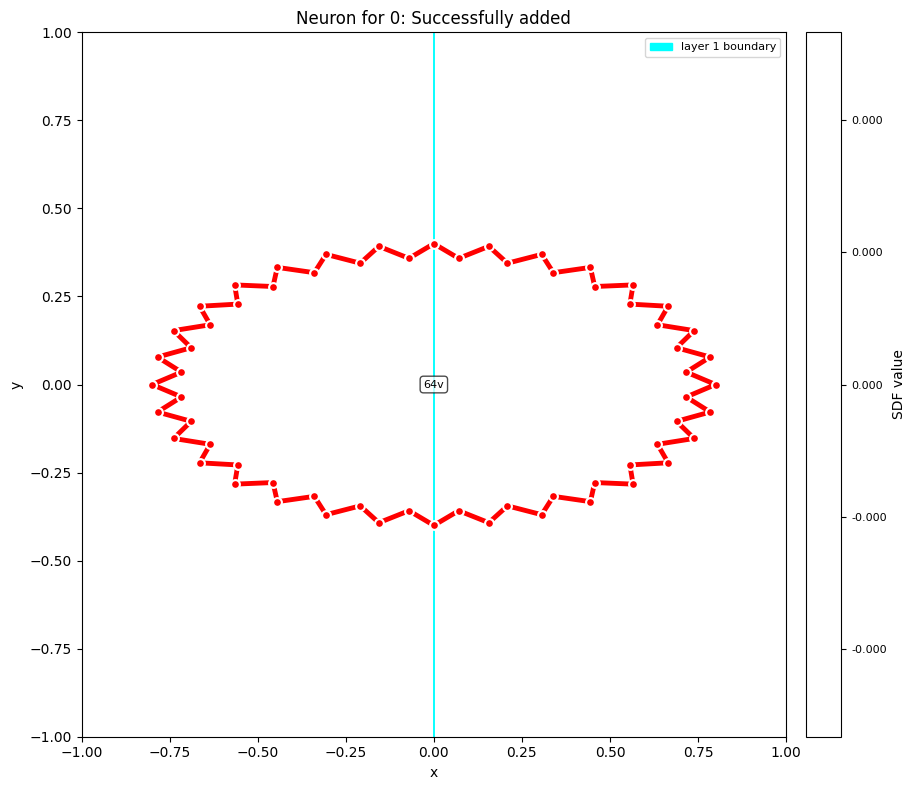

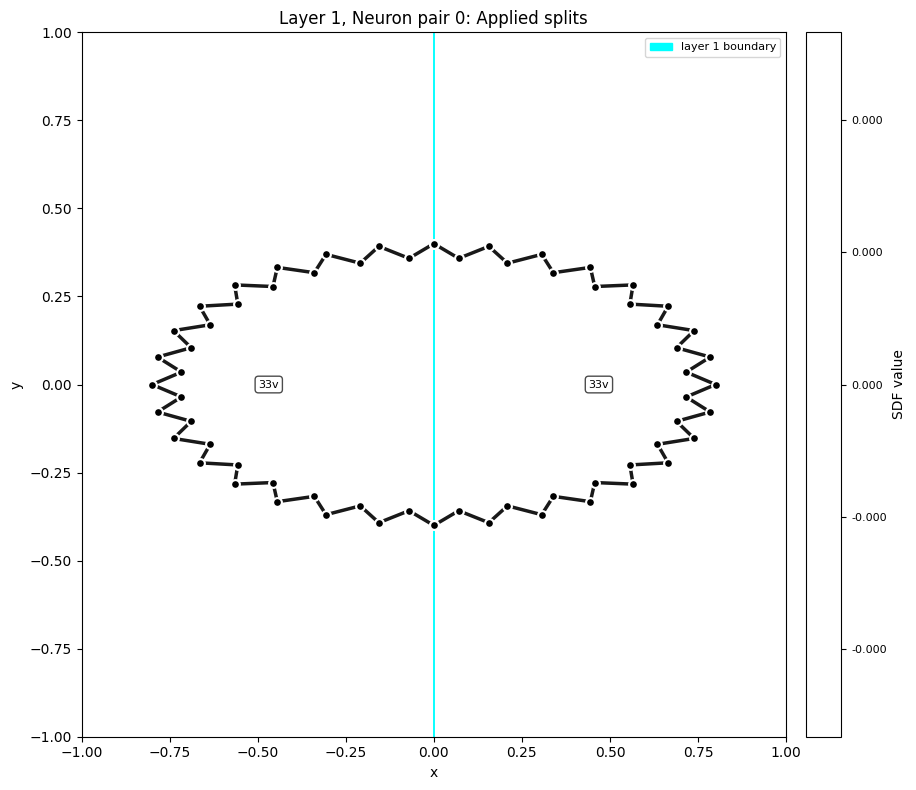

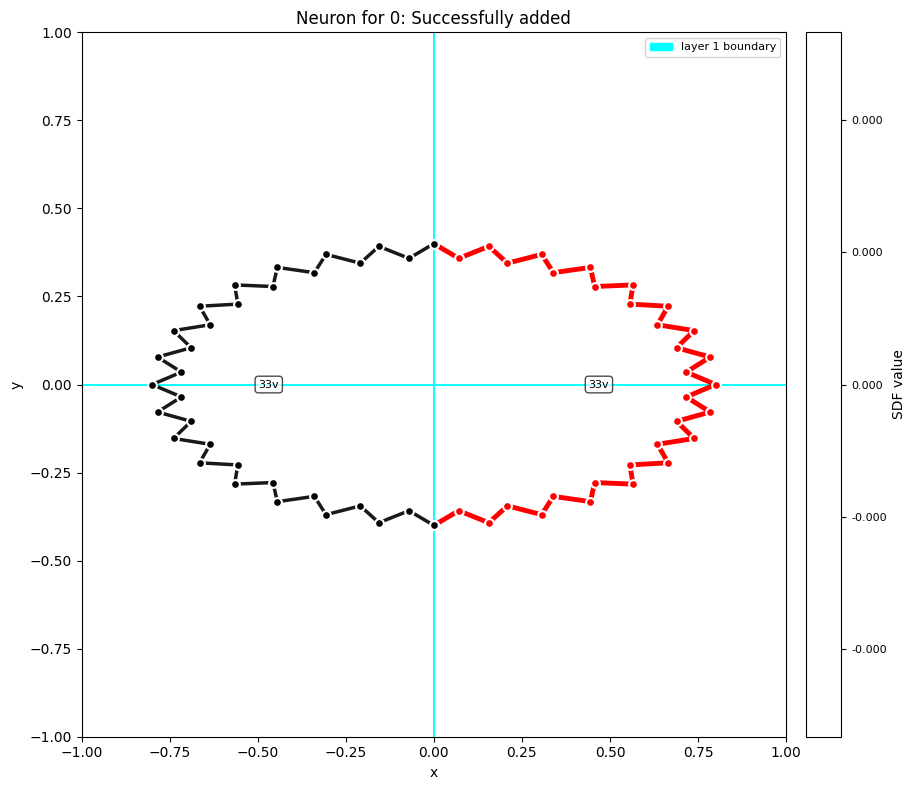

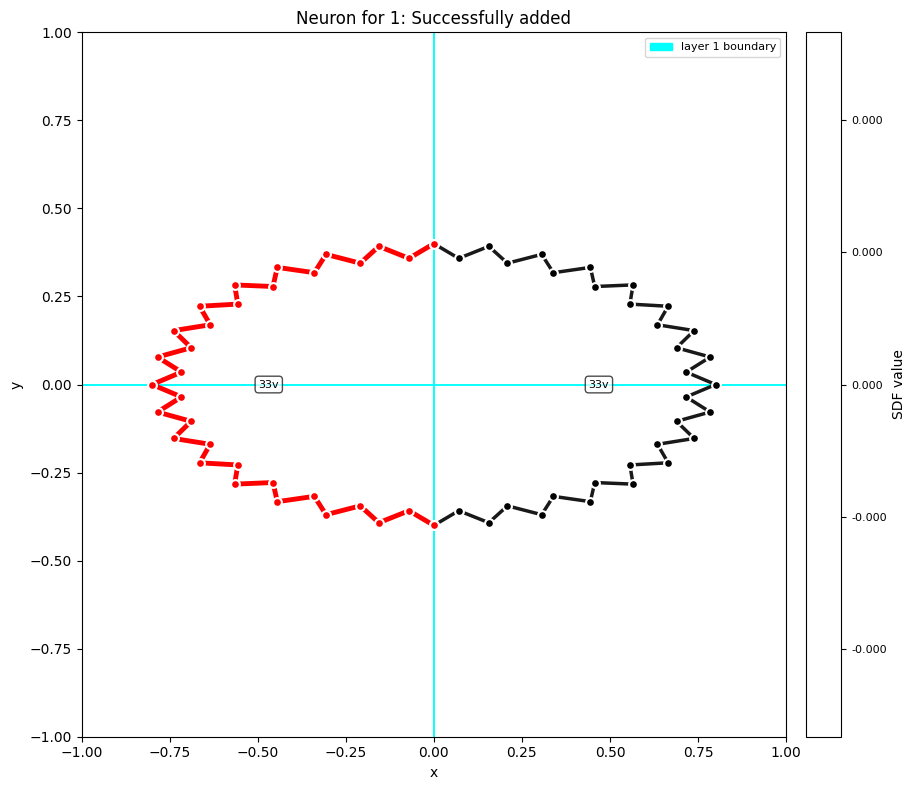

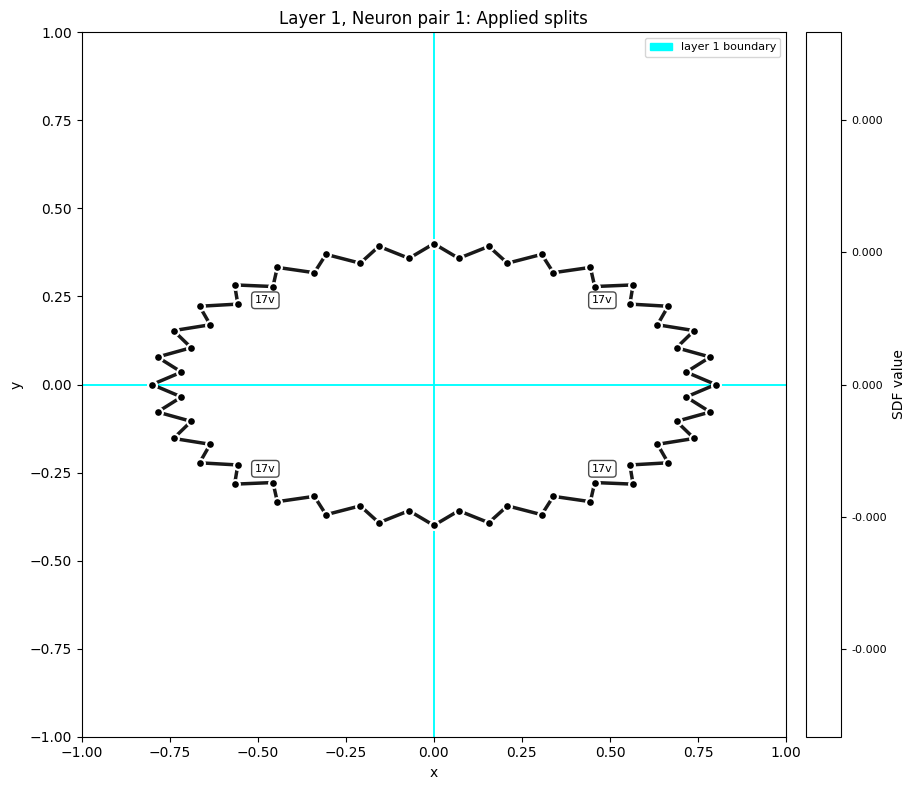

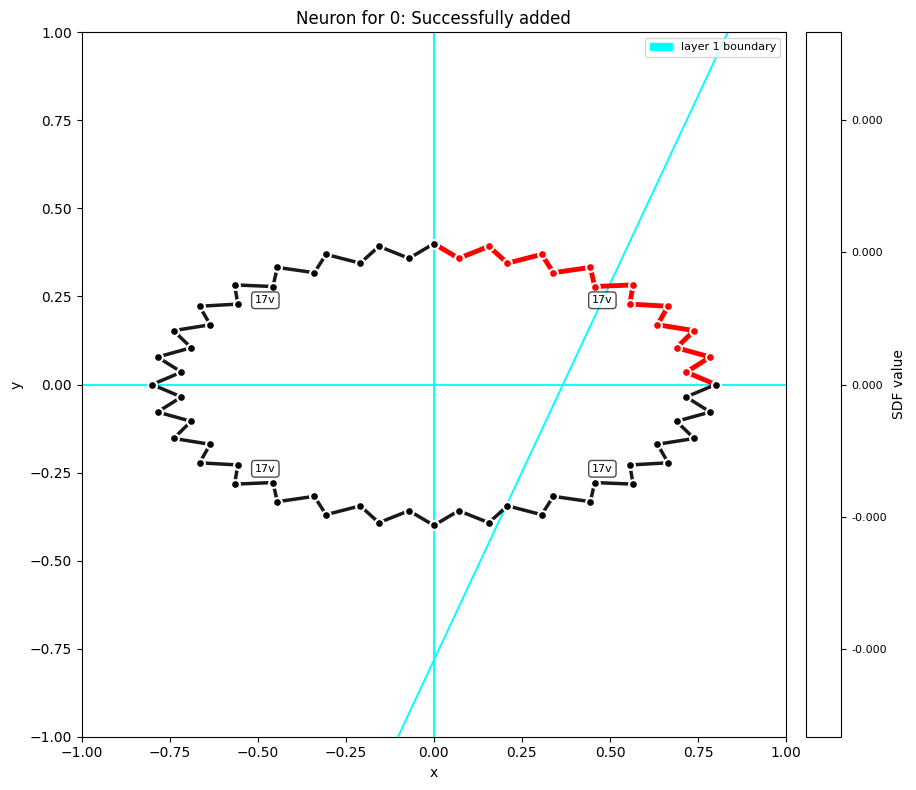

Surface 1: Solution error too large - skipping
Surface 1: Solution error too large - skipping


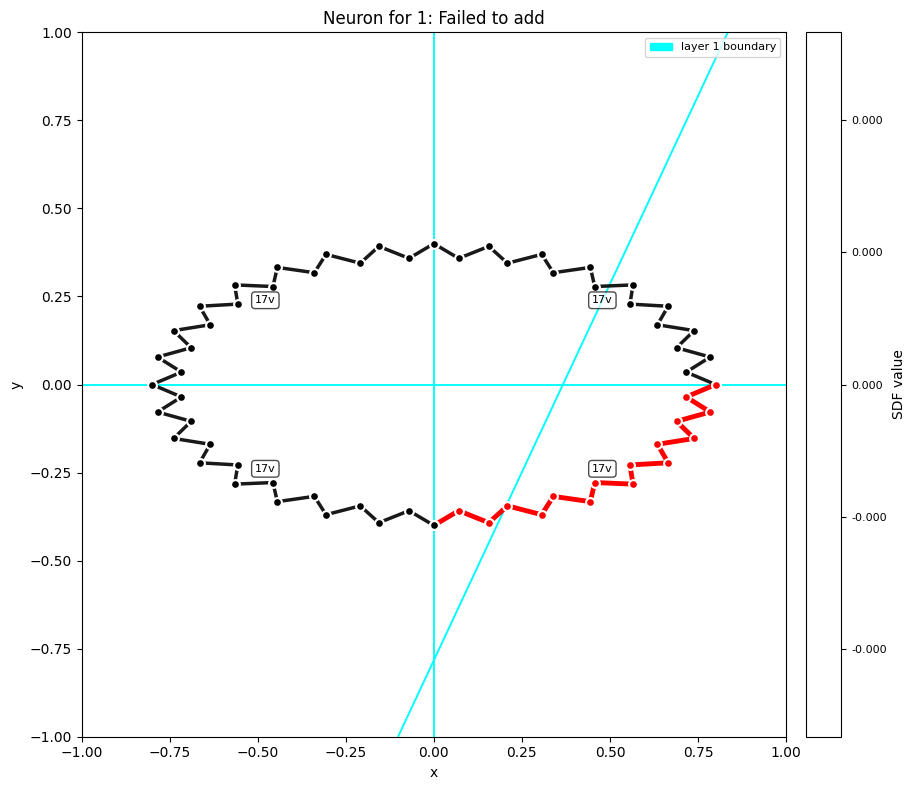

Surface 2: Solution error too large - skipping
Surface 2: Solution error too large - skipping


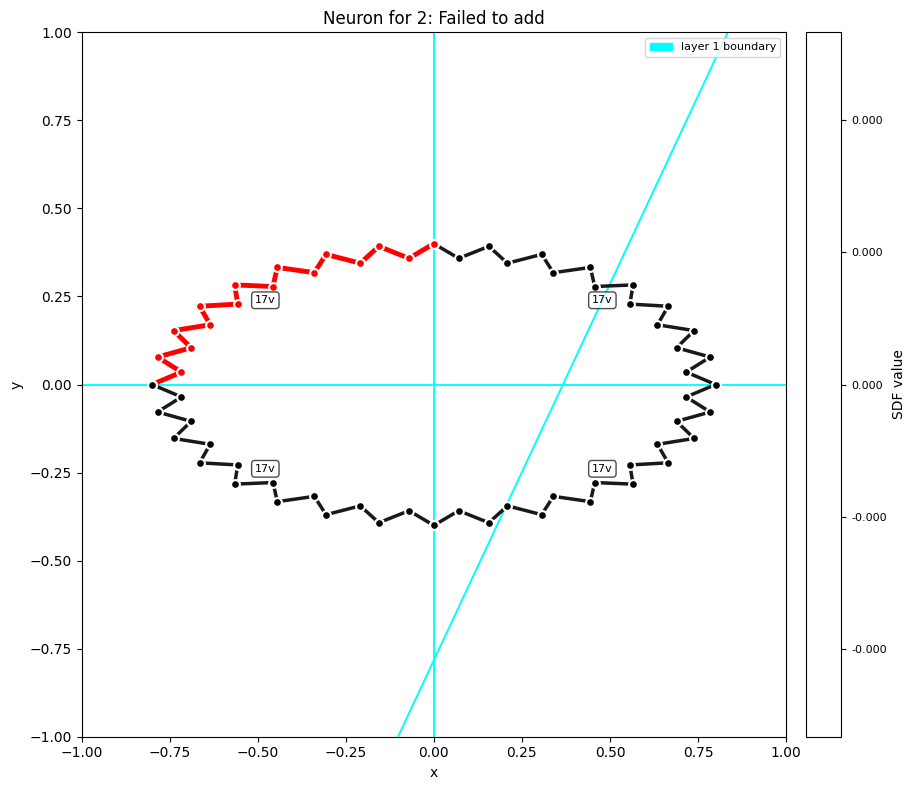

Surface 3: Solution error too large - skipping
Surface 3: Solution error too large - skipping


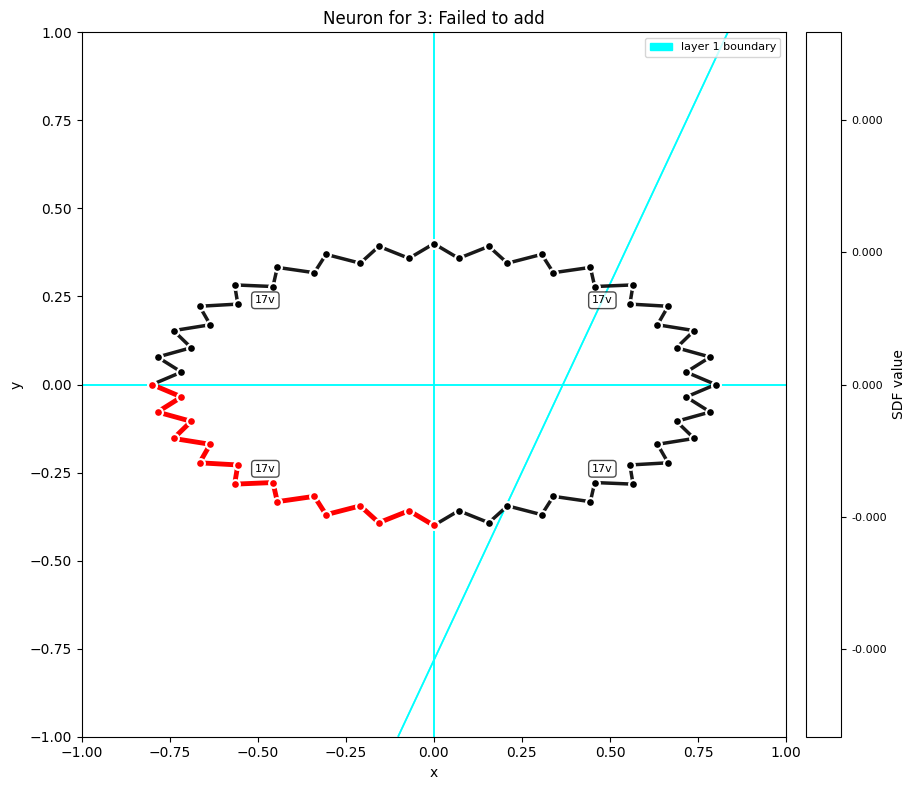

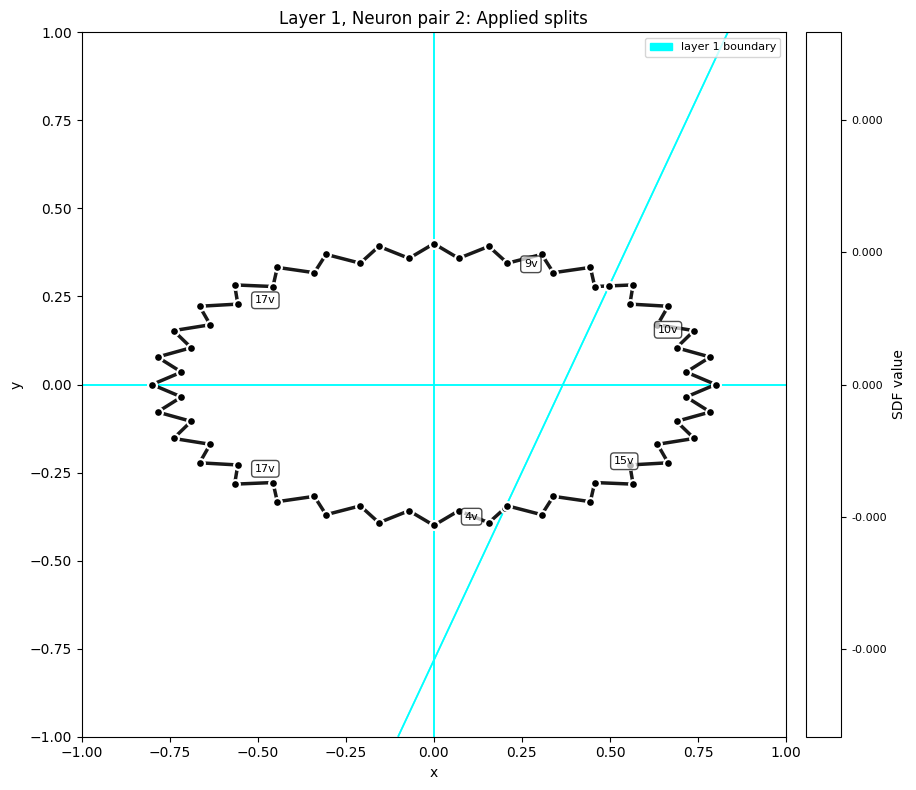

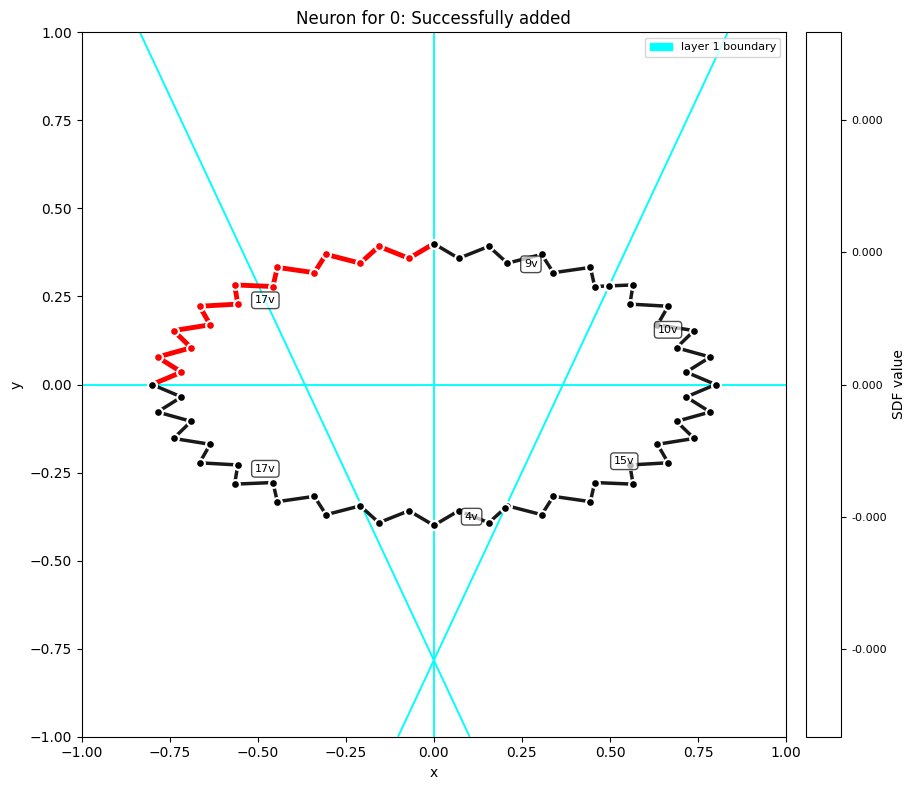

Surface 1: Solution error too large - skipping
Surface 1: Solution error too large - skipping


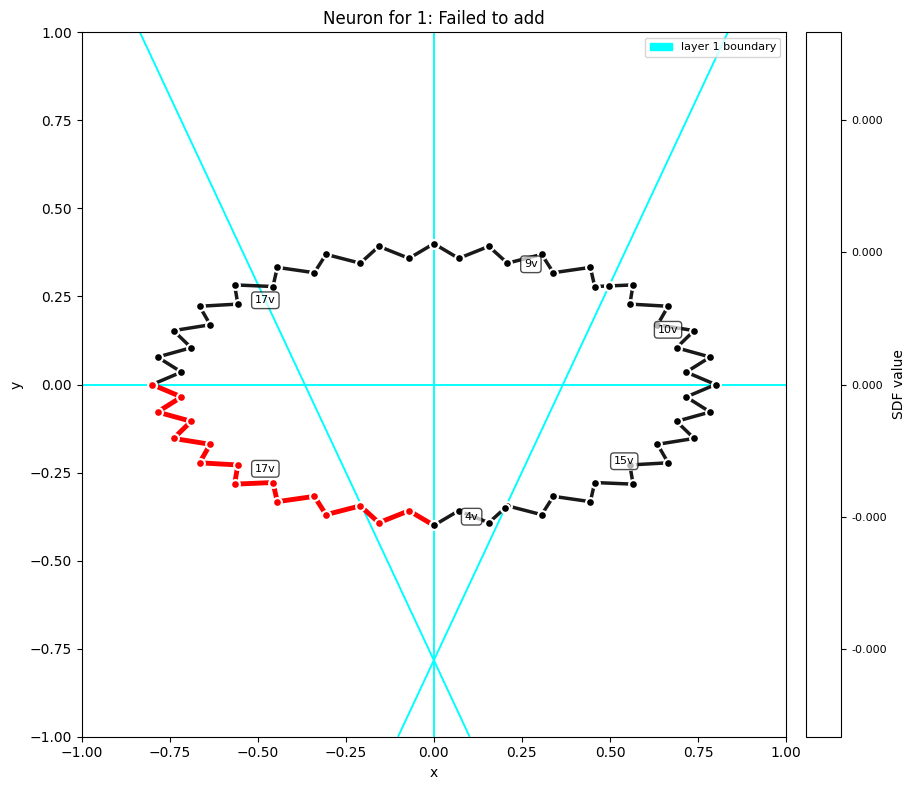

Surface 2: Solution error too large - skipping
Surface 2: Solution error too large - skipping


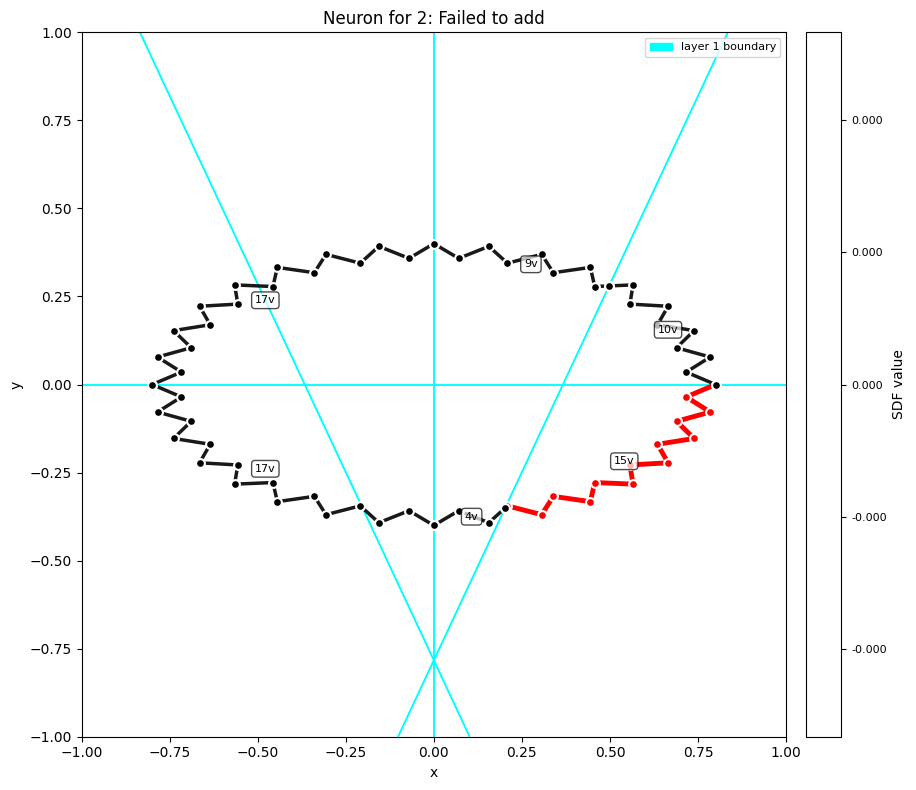

Surface 3: Solution error too large - skipping


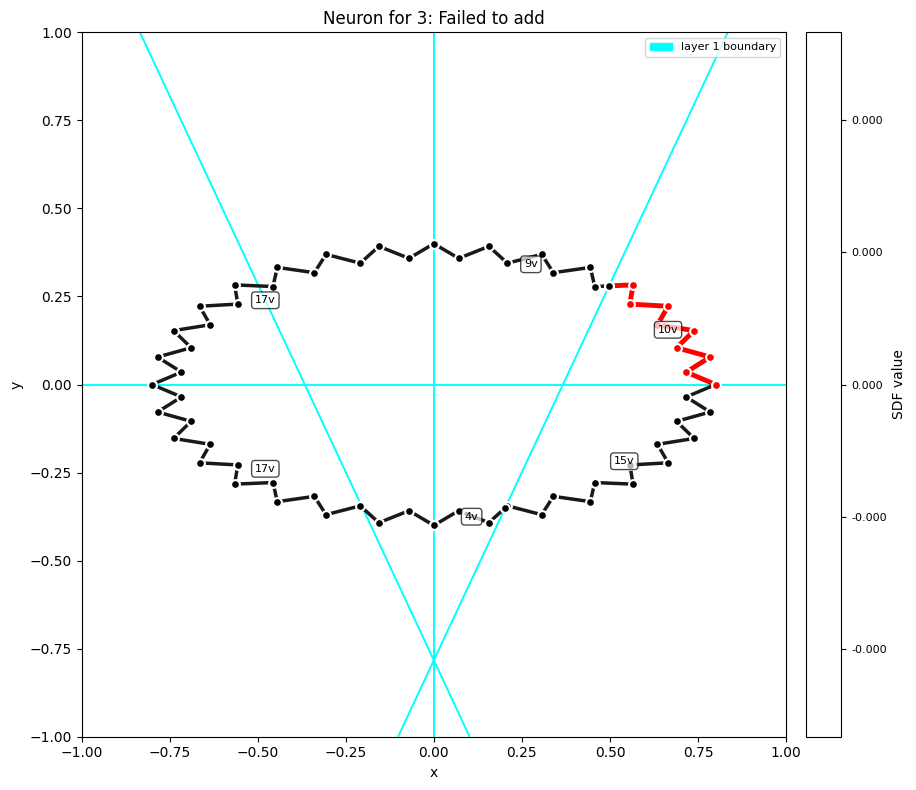

Surface 4: Solution error too large - skipping


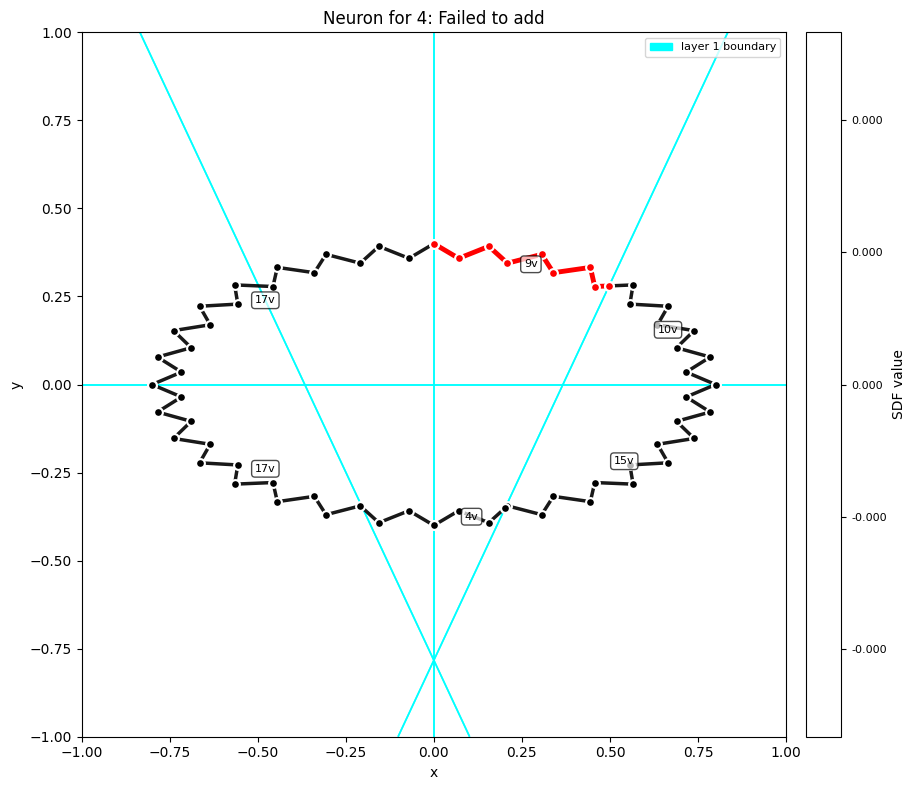

Surface 5: Solution error too large - skipping
Surface 5: Solution error too large - skipping


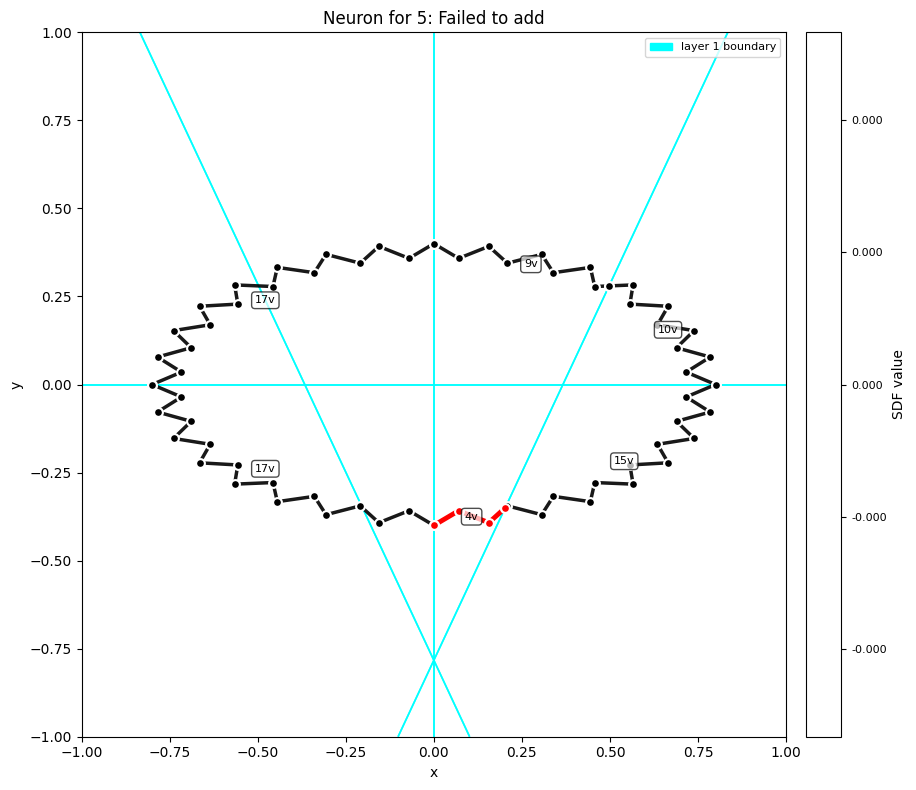

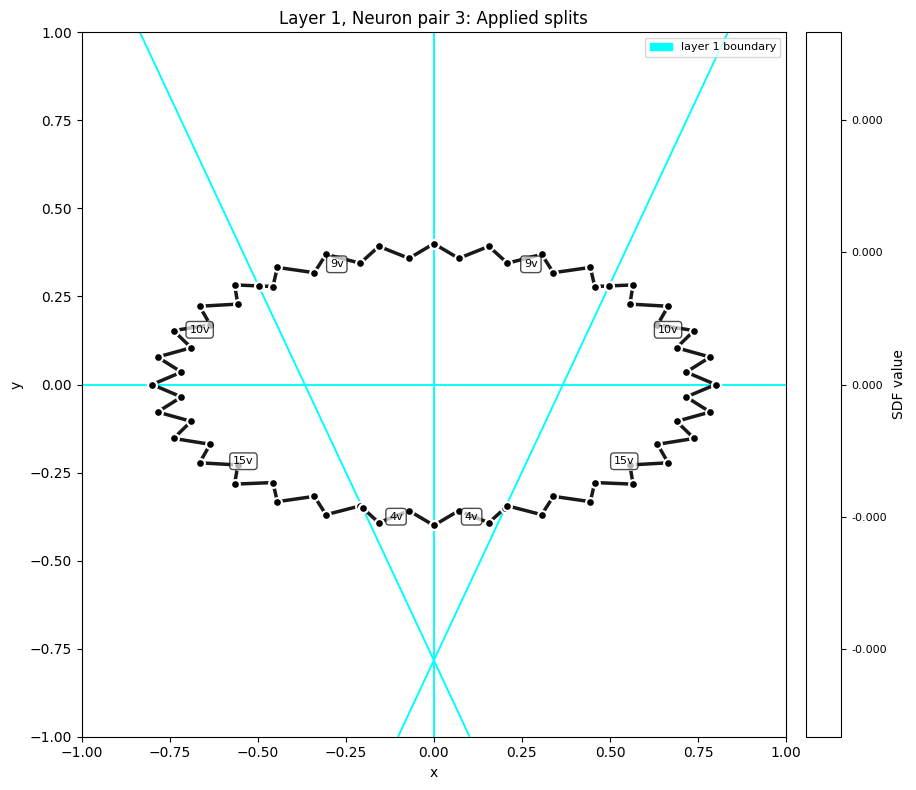

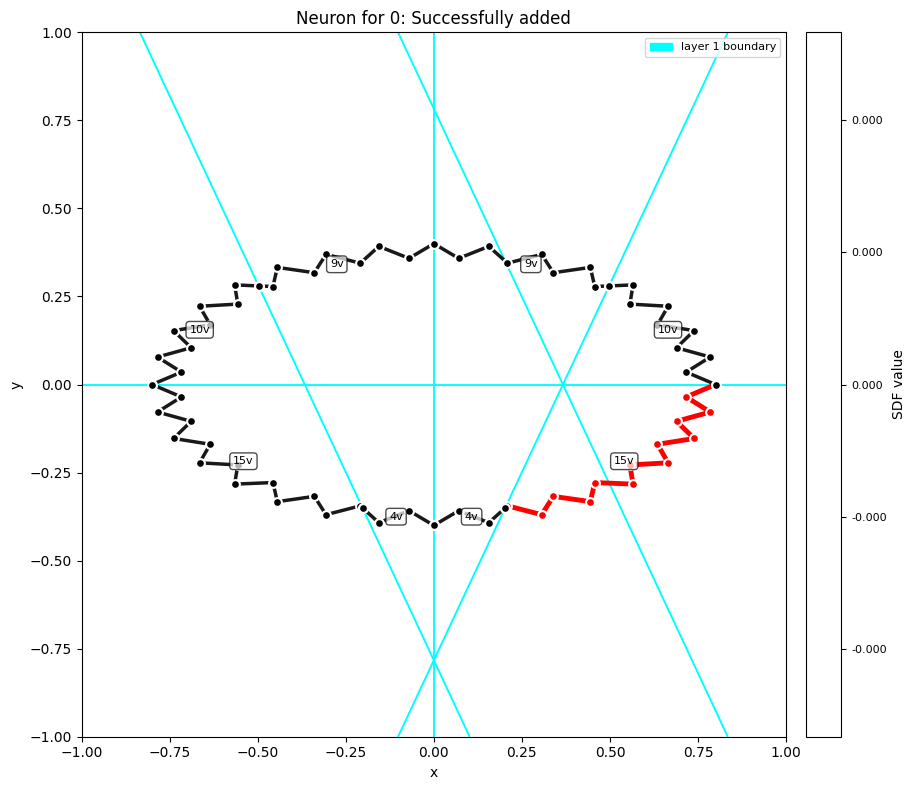

Surface 1: Solution error too large - skipping
Surface 1: Solution error too large - skipping


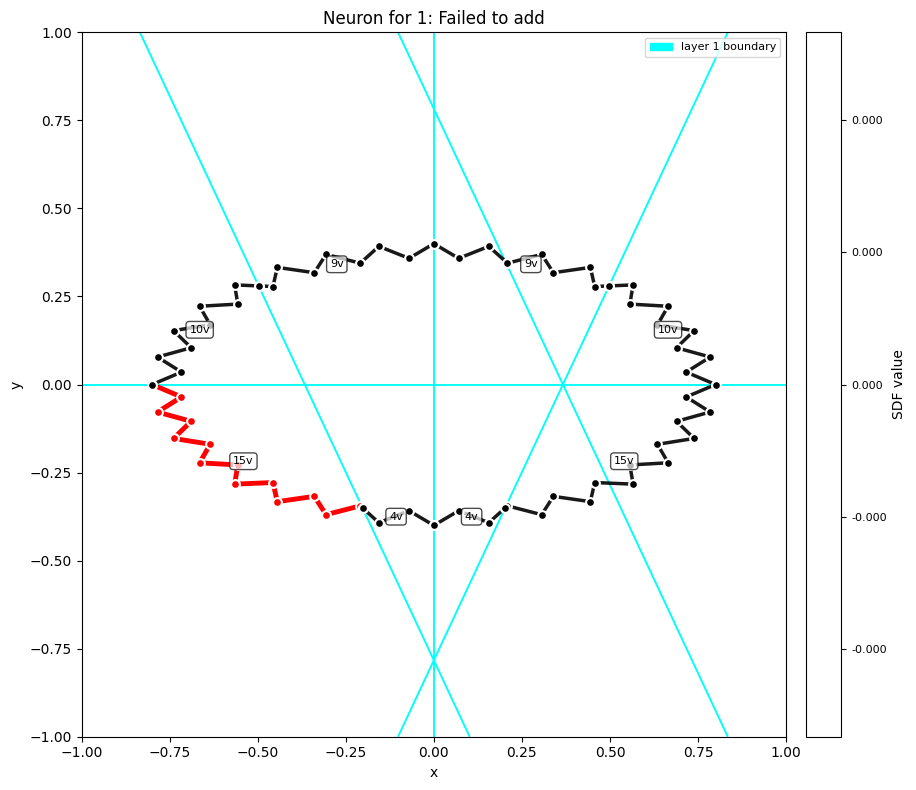

Surface 2: Solution error too large - skipping


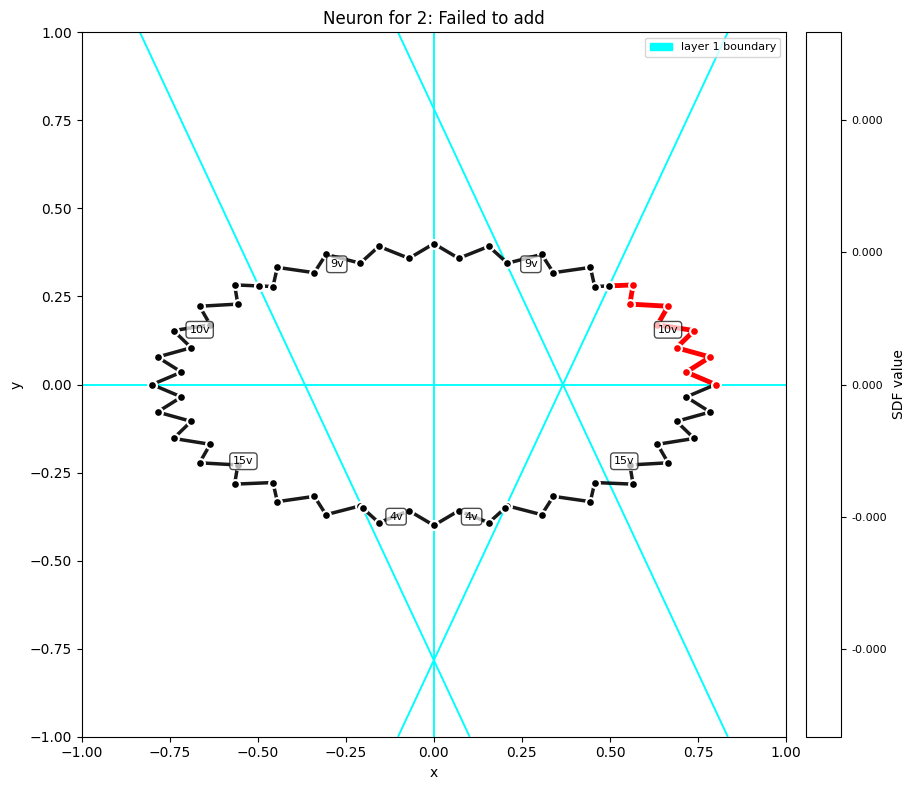

Surface 3: Solution error too large - skipping


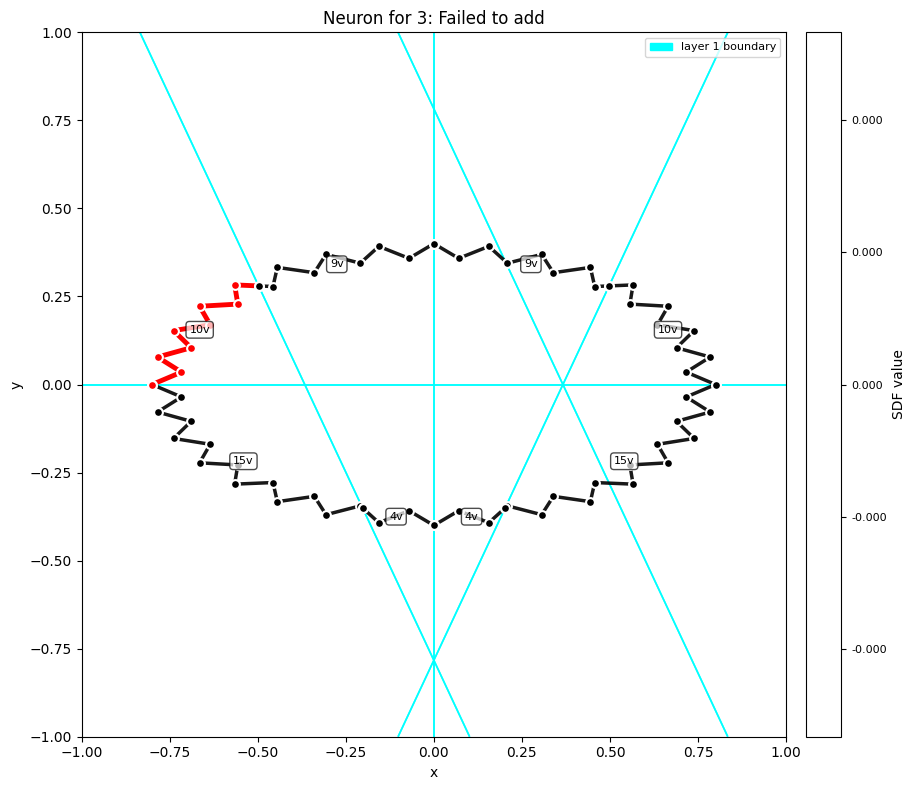

Surface 4: Solution error too large - skipping


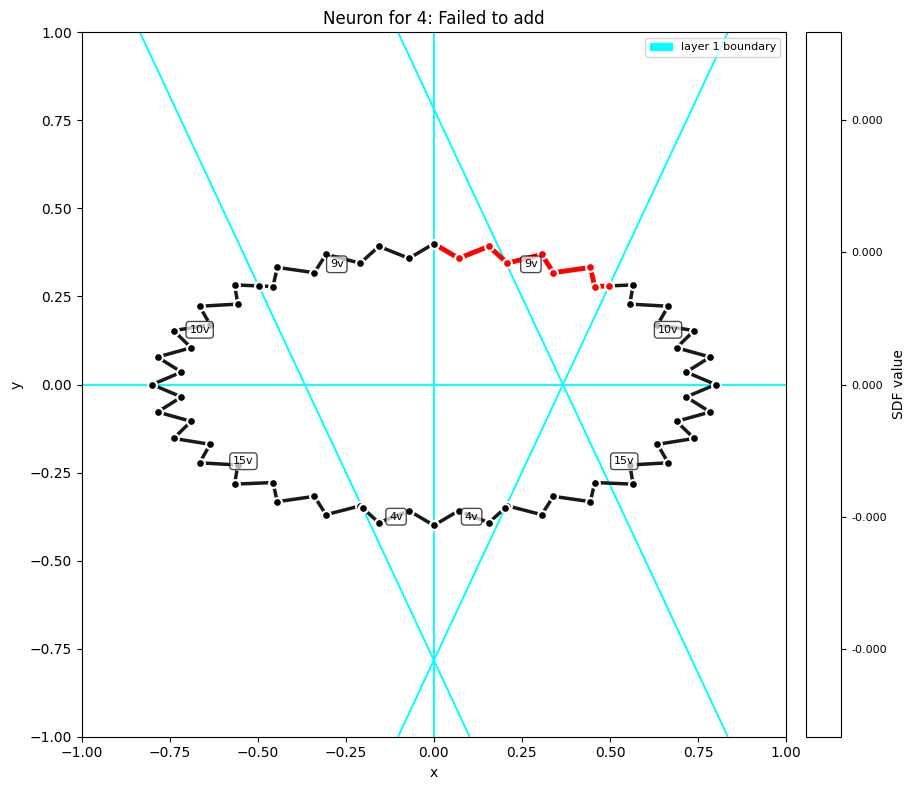

Surface 5: Solution error too large - skipping


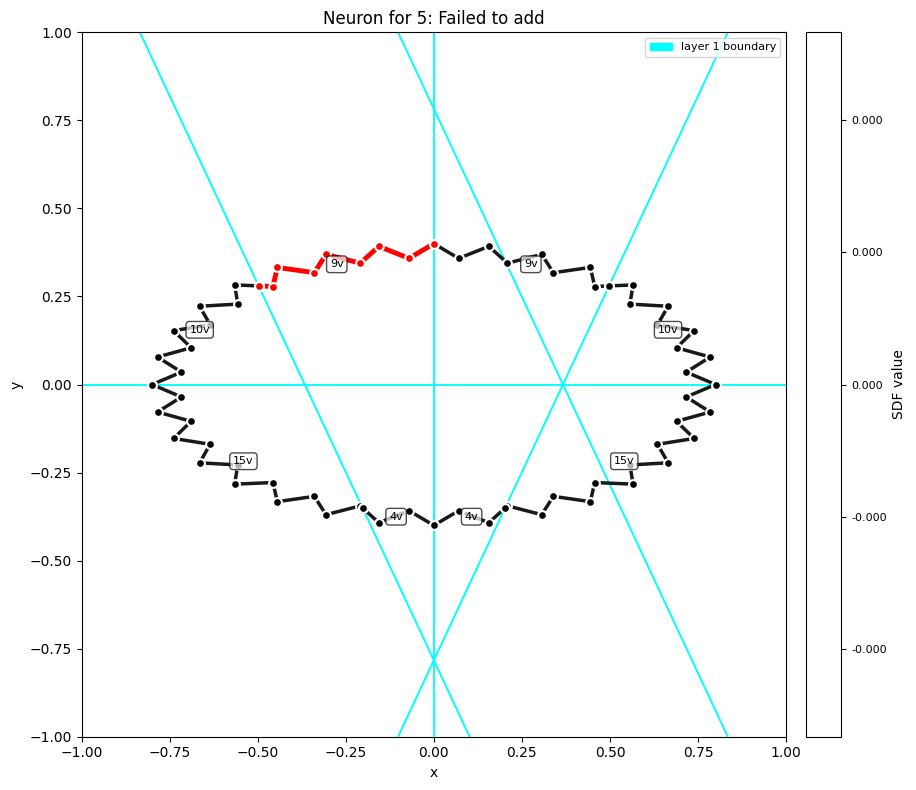

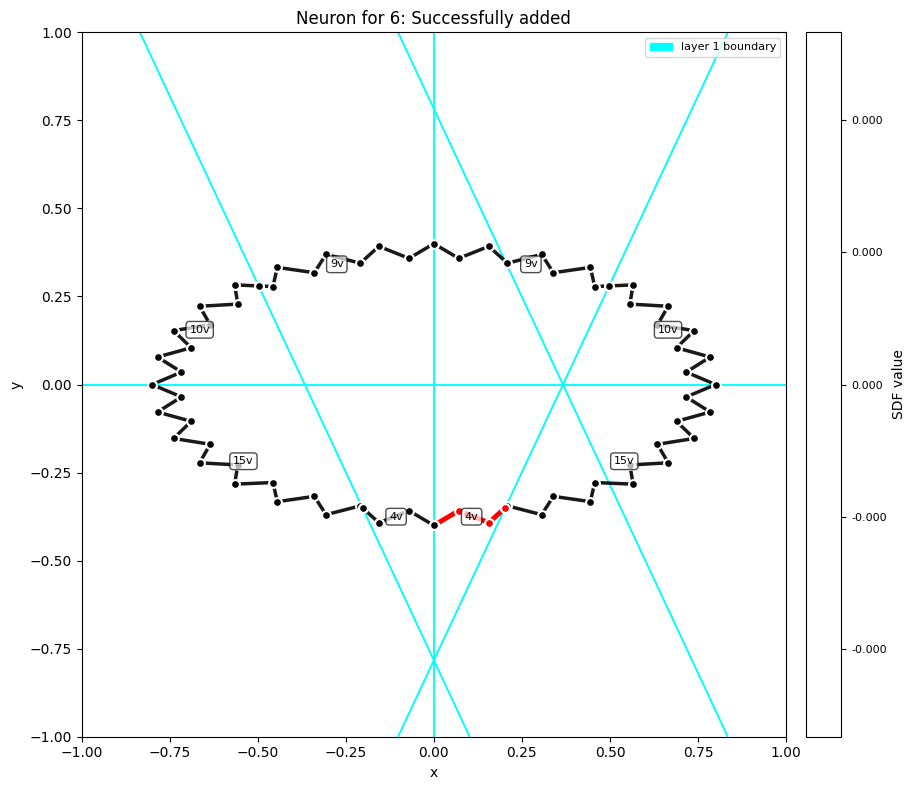

Surface 7: Solution error too large - skipping
Surface 7: Solution error too large - skipping


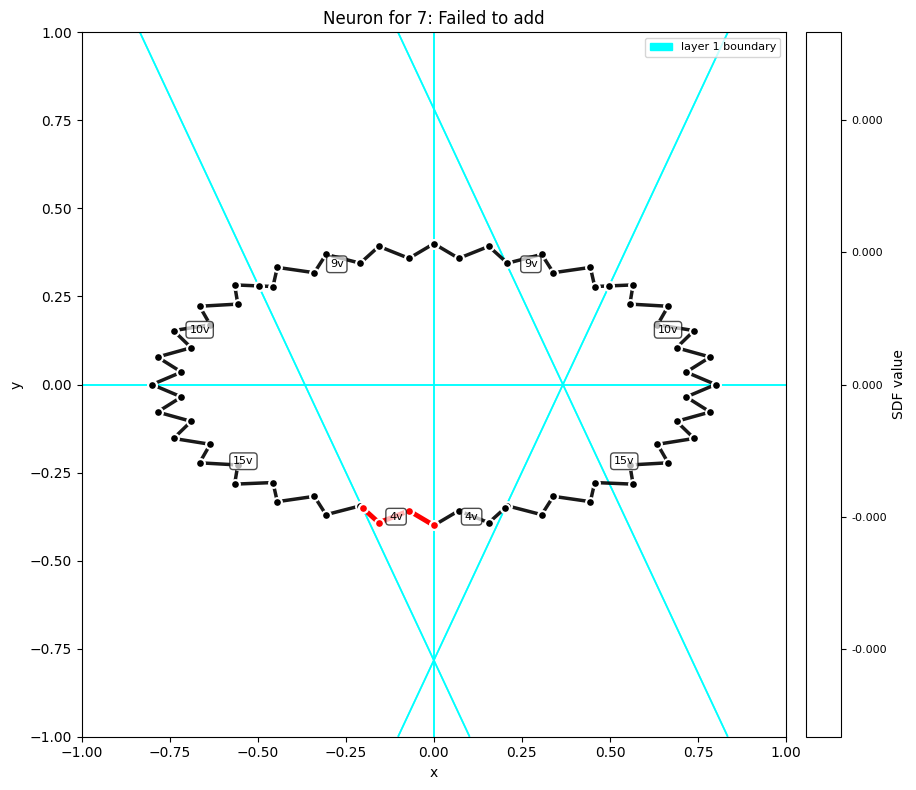

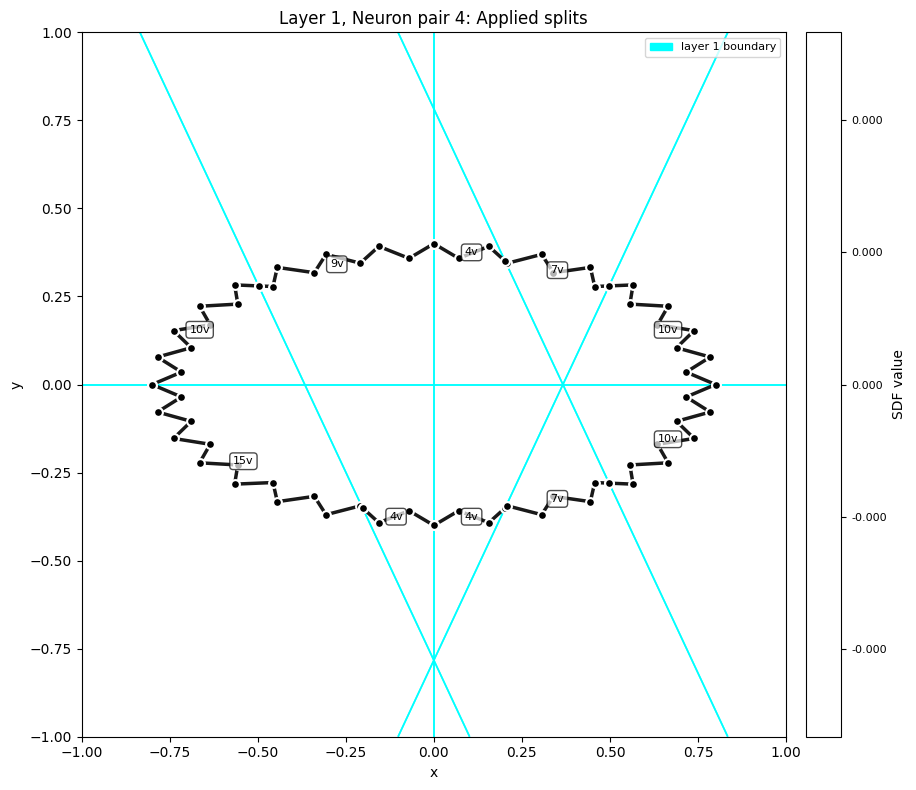

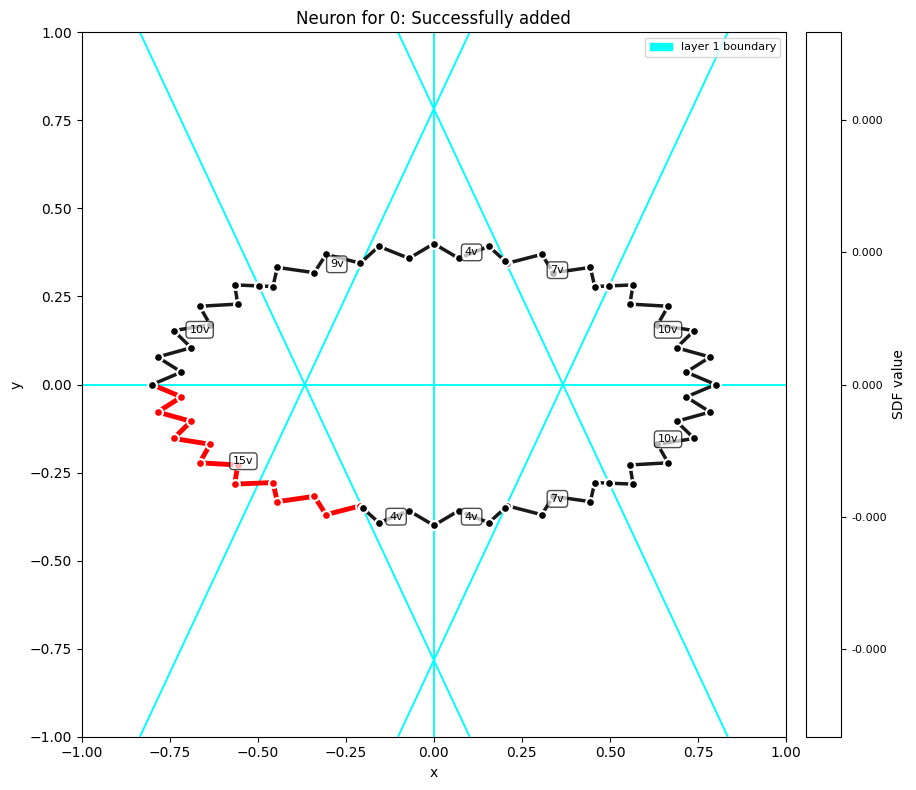

Surface 1: Solution error too large - skipping


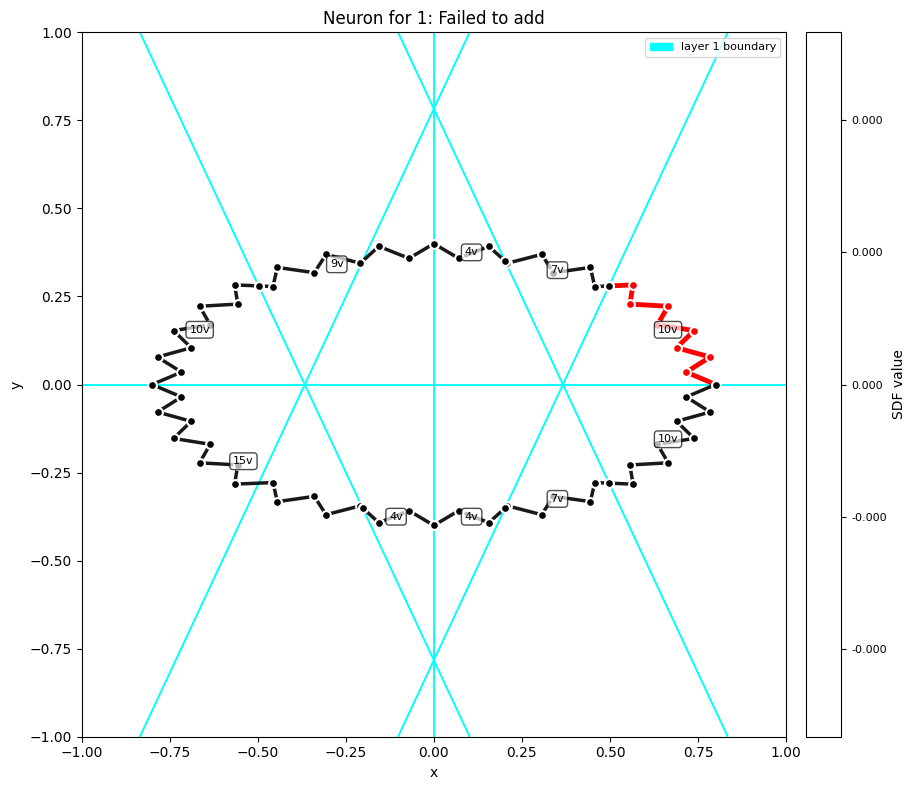

Surface 2: Solution error too large - skipping


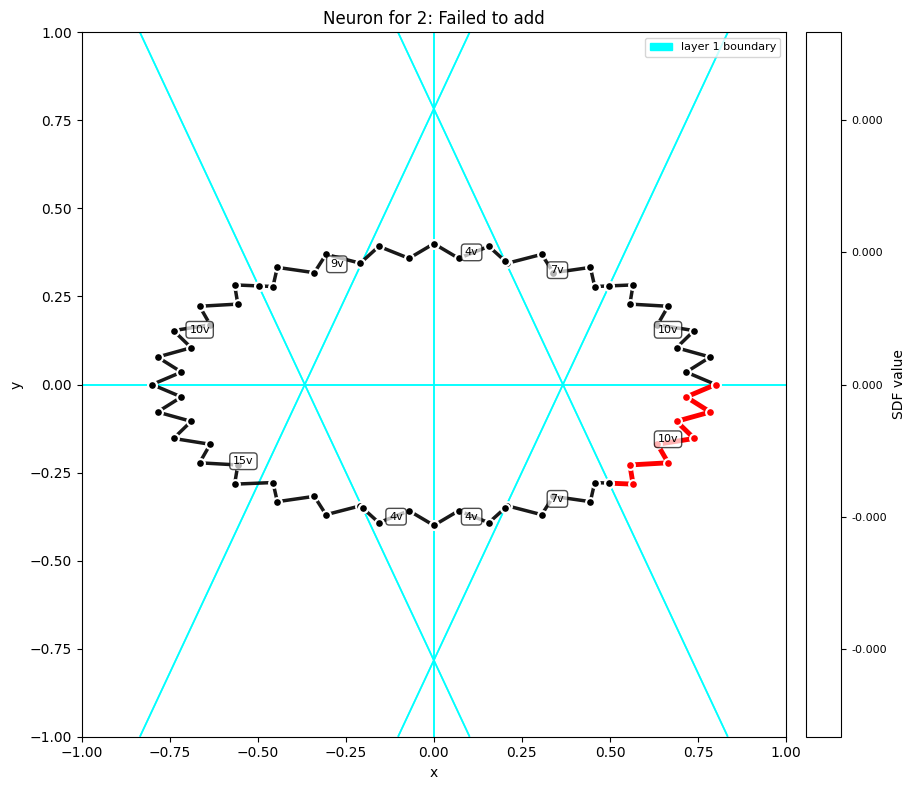

Surface 3: Solution error too large - skipping


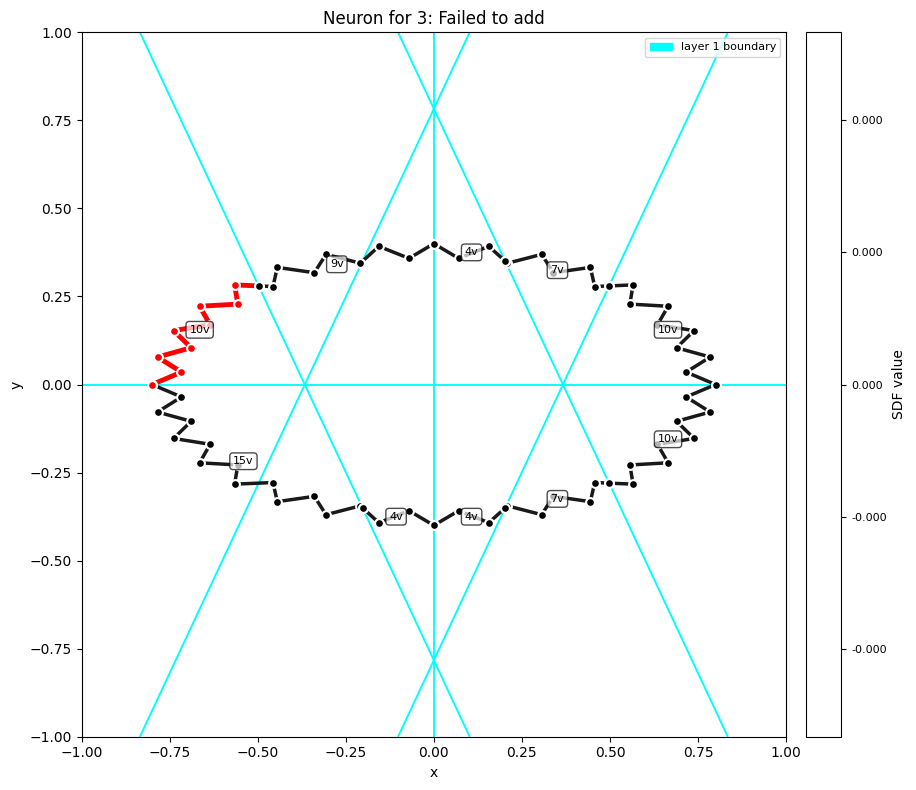

Surface 4: Solution error too large - skipping


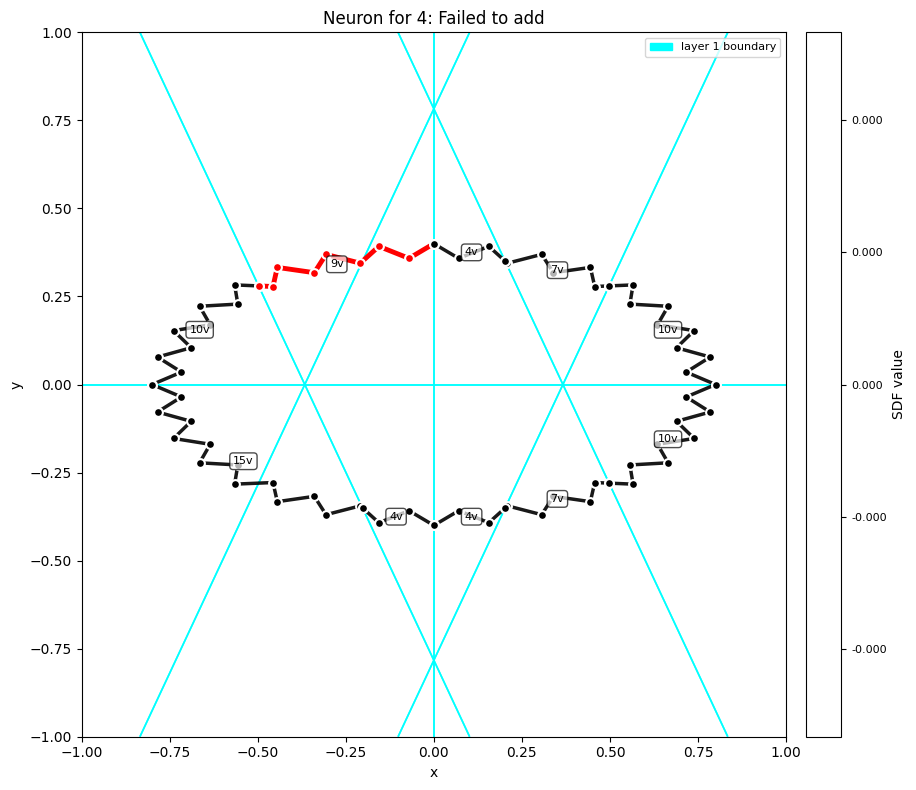

Surface 5: Solution error too large - skipping


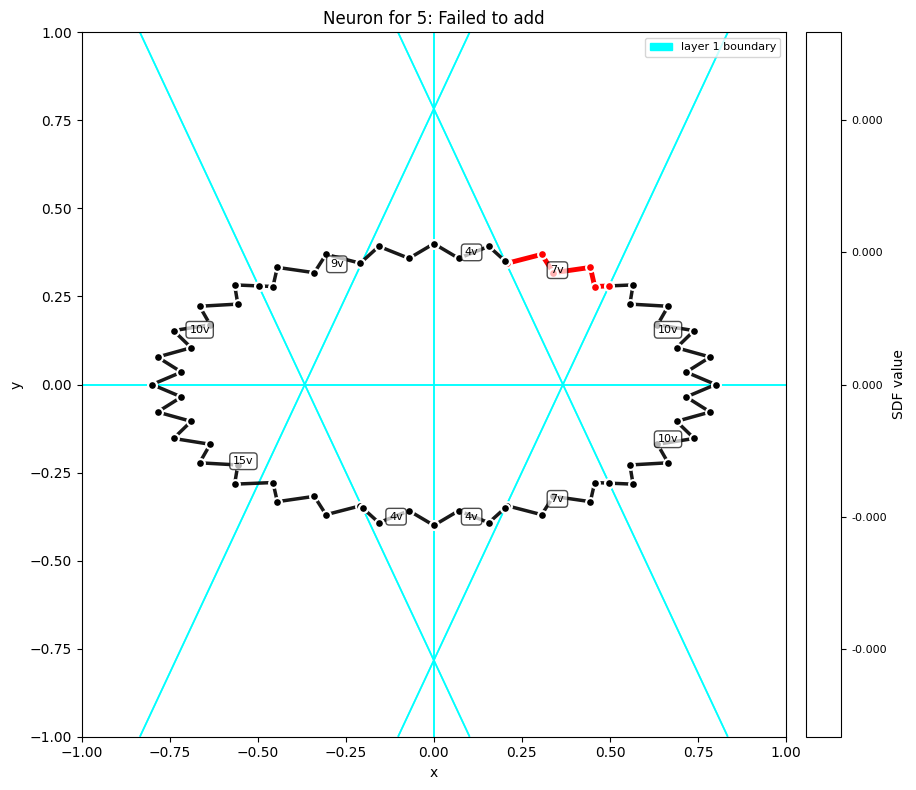

Surface 6: Solution error too large - skipping


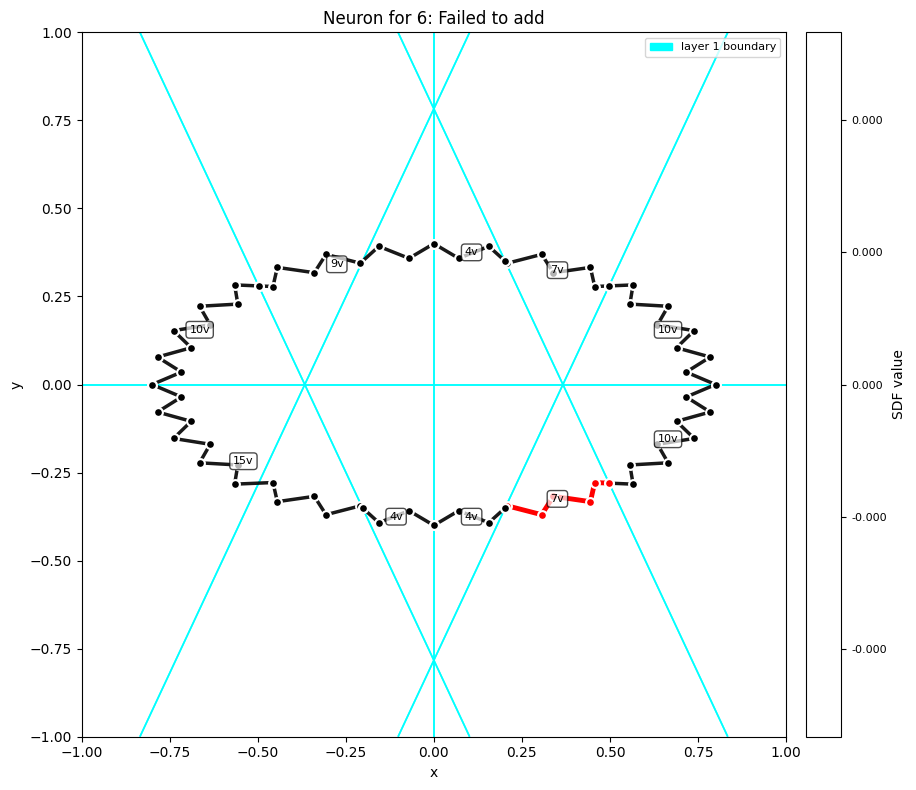

Surface 7: Solution error too large - skipping


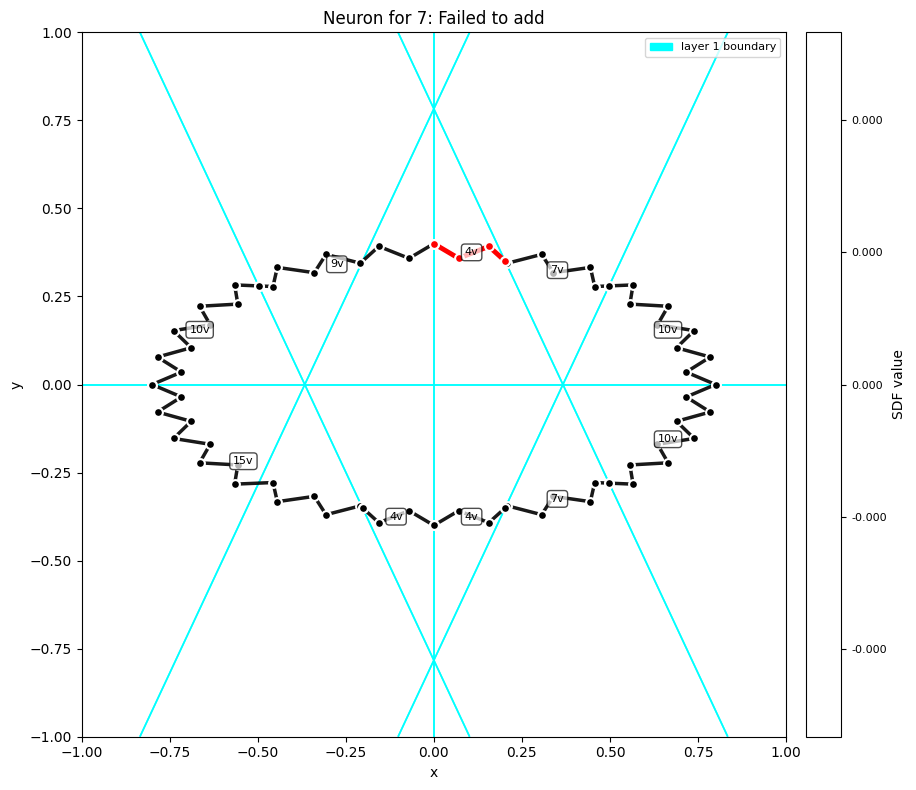

Surface 8: Solution error too large - skipping


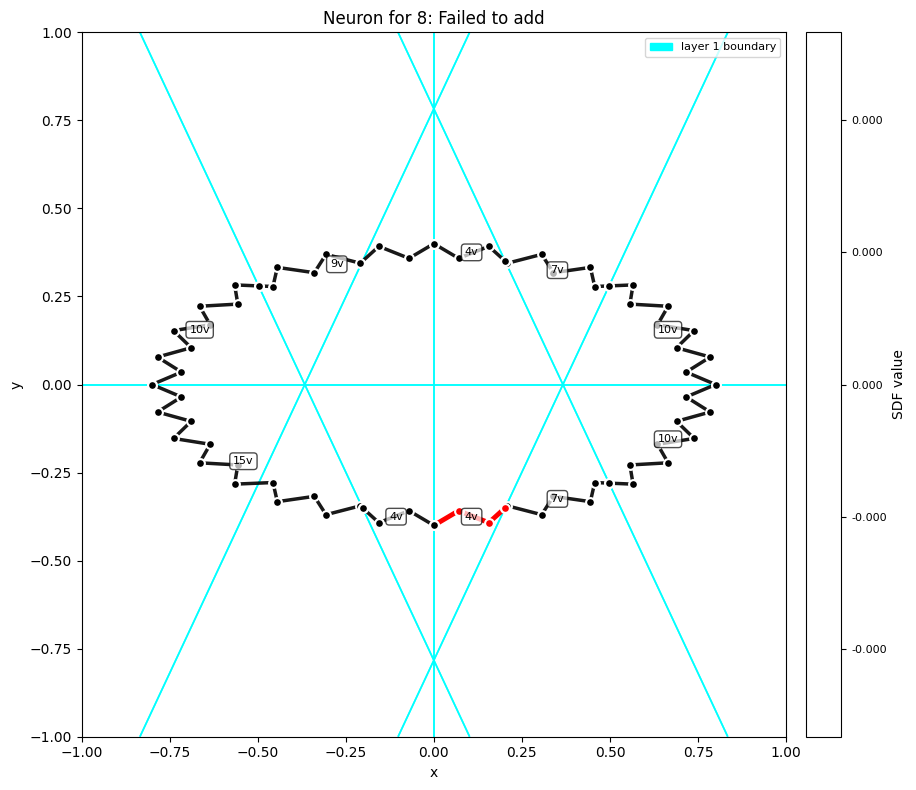

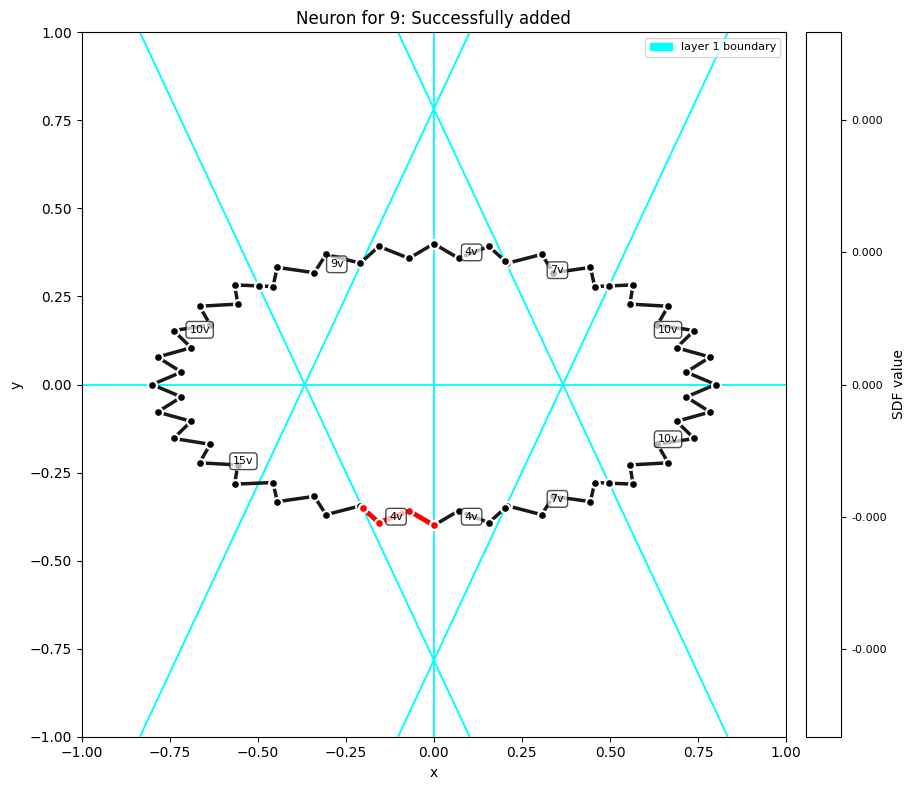

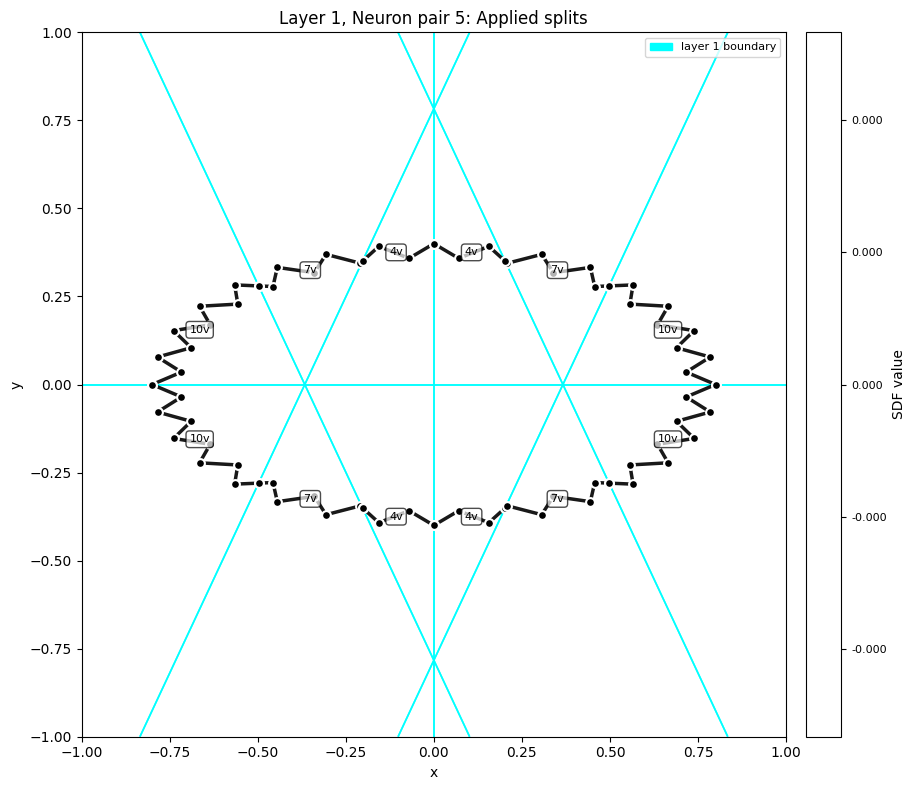

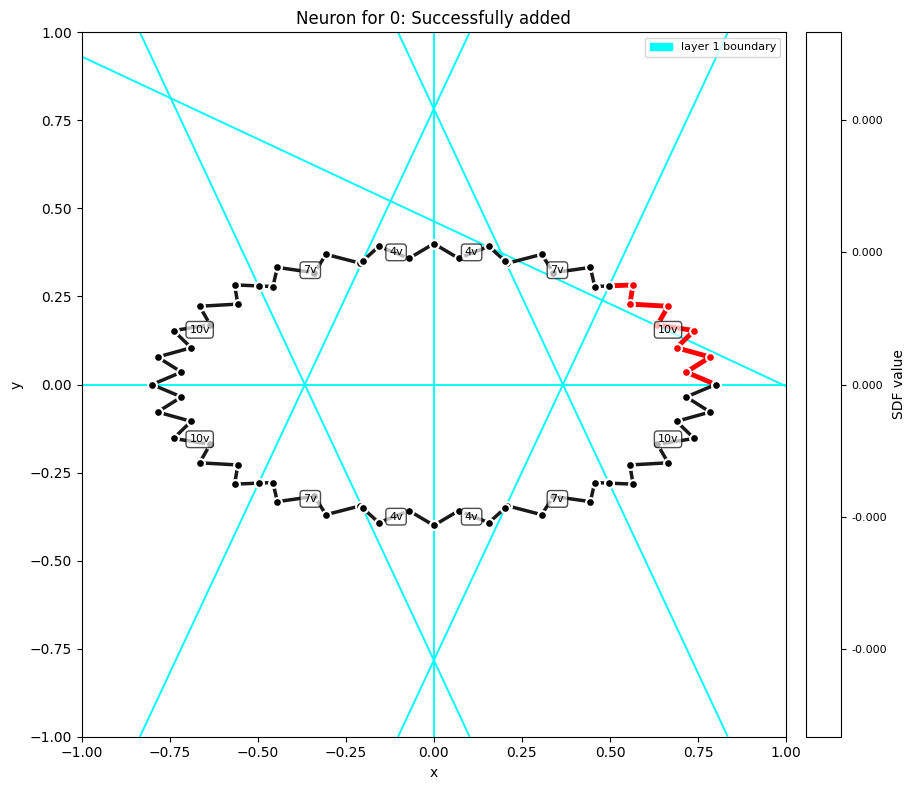

Surface 1: Solution error too large - skipping


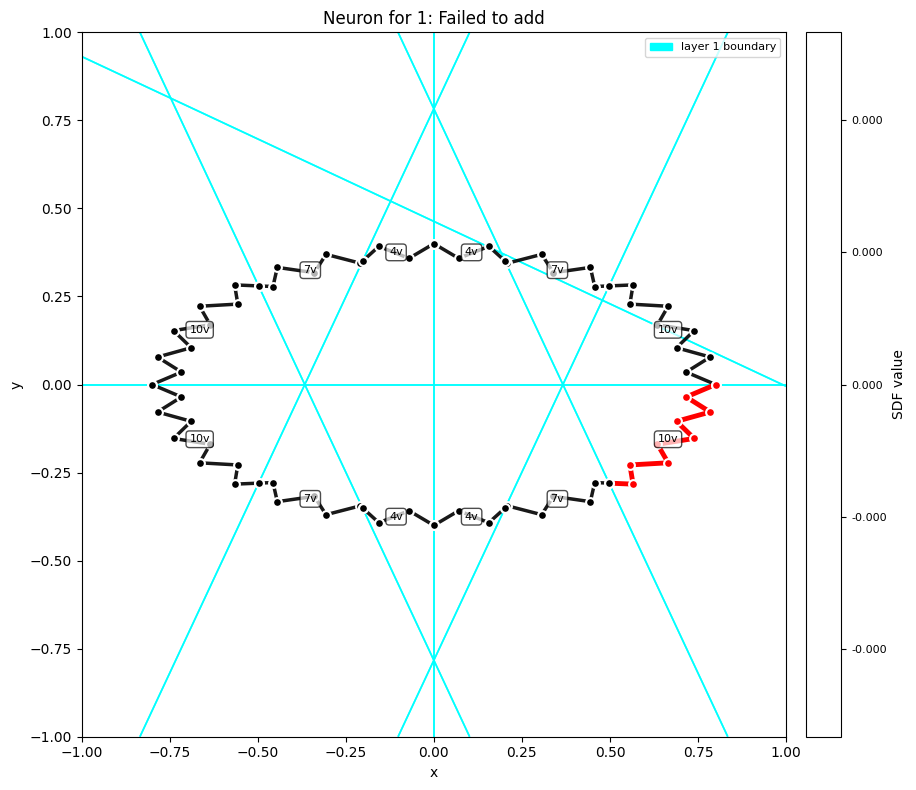

Surface 2: Solution error too large - skipping


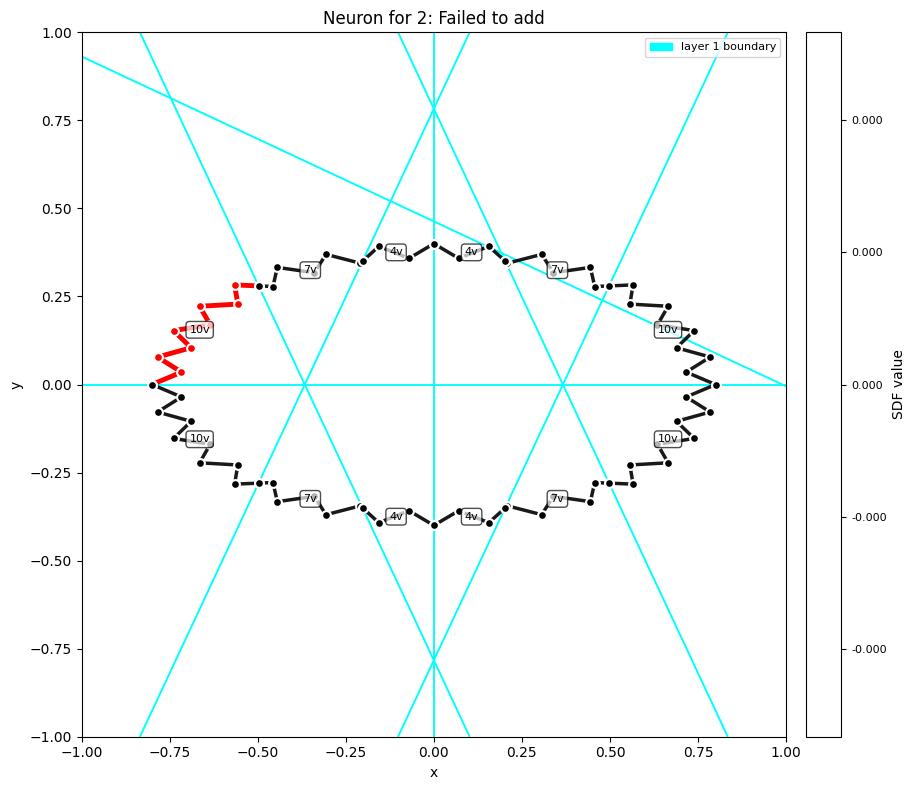

Surface 3: Solution error too large - skipping


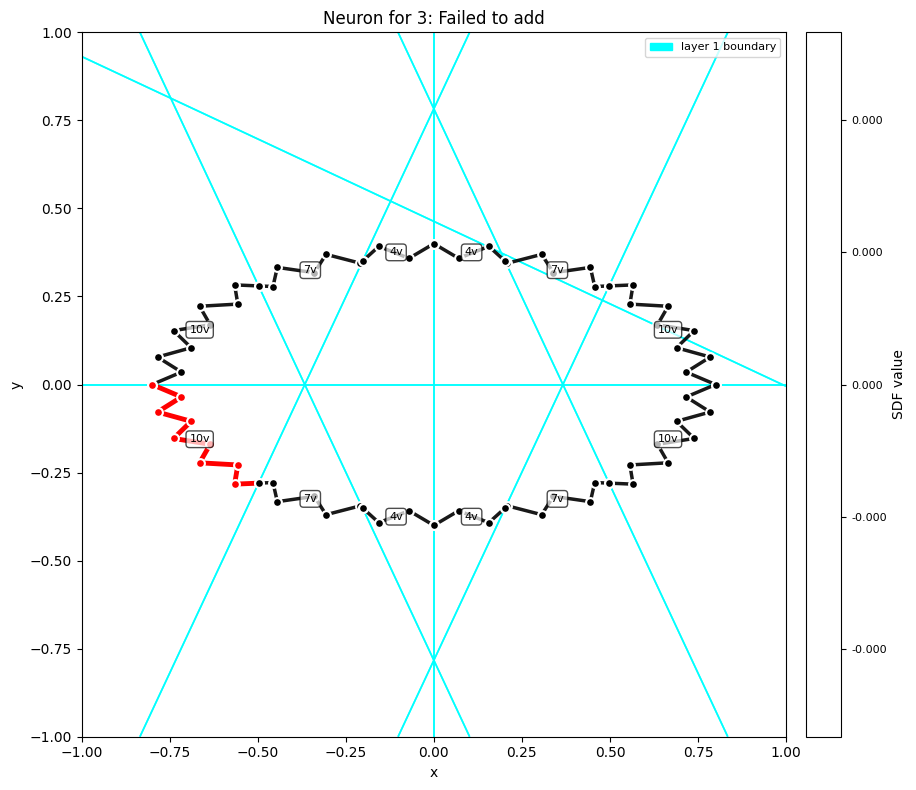

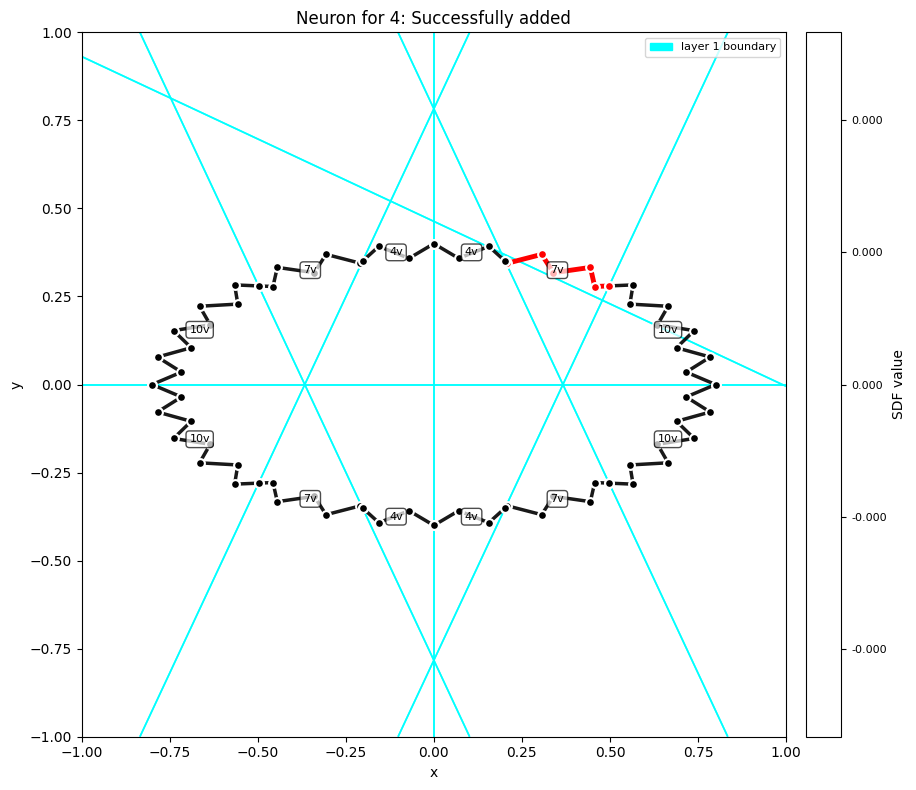

Surface 5: Solution error too large - skipping


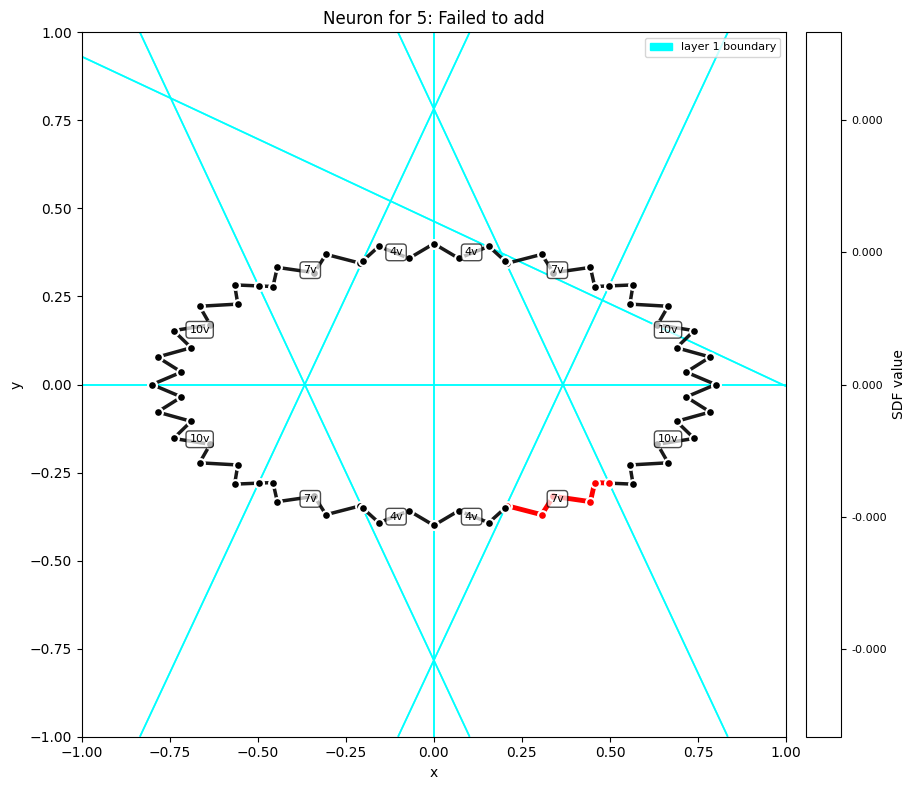

Surface 6: Solution error too large - skipping


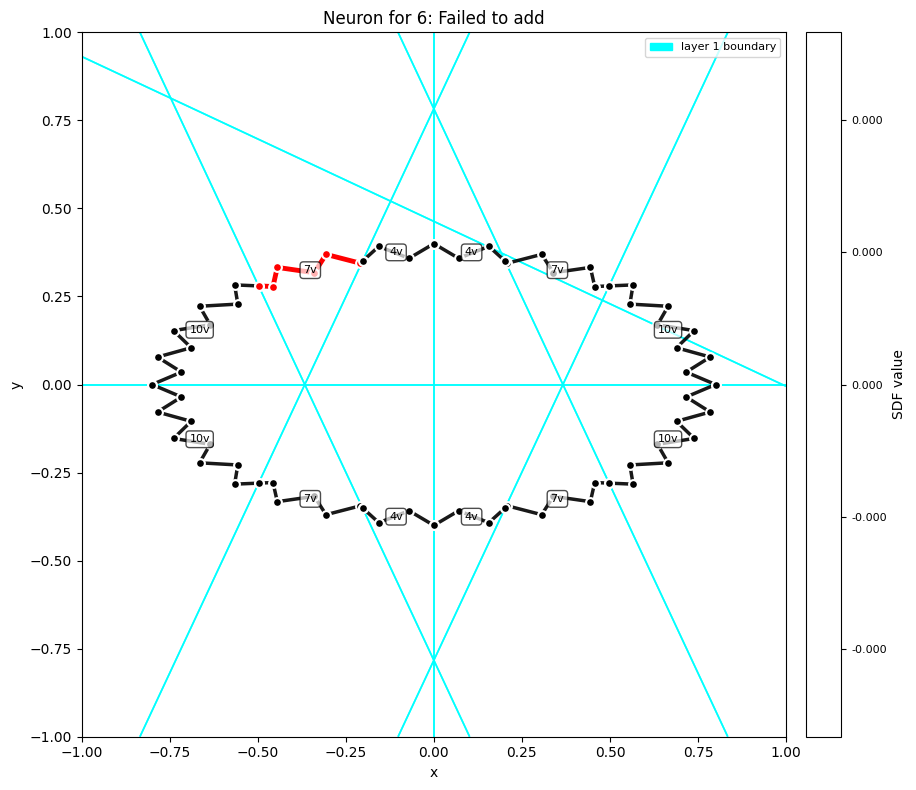

Surface 7: Solution error too large - skipping


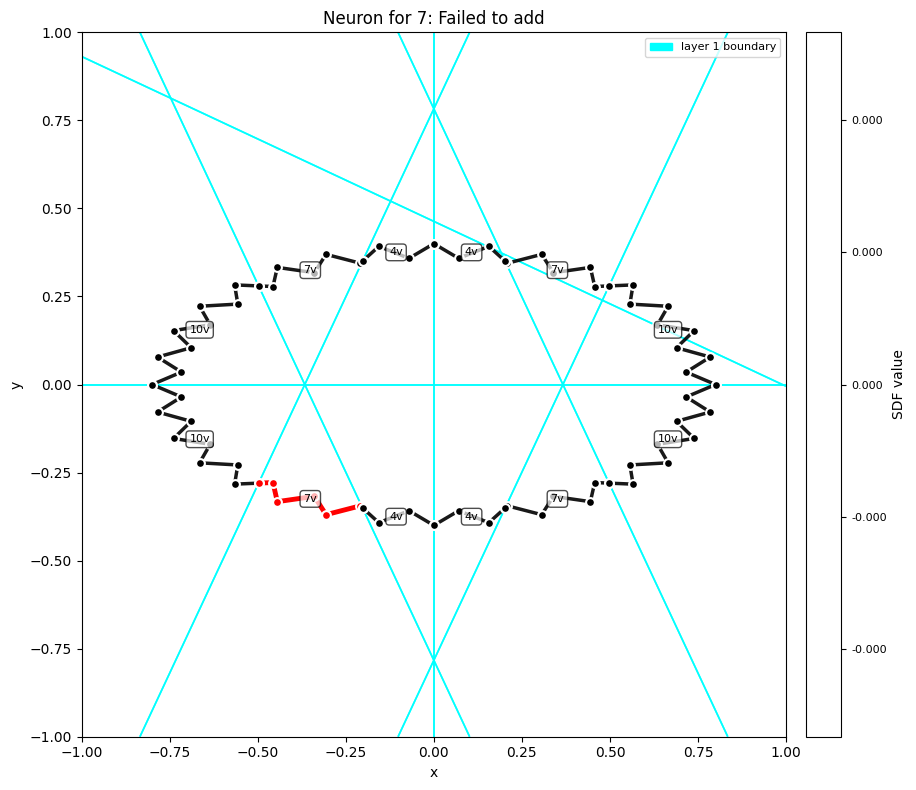

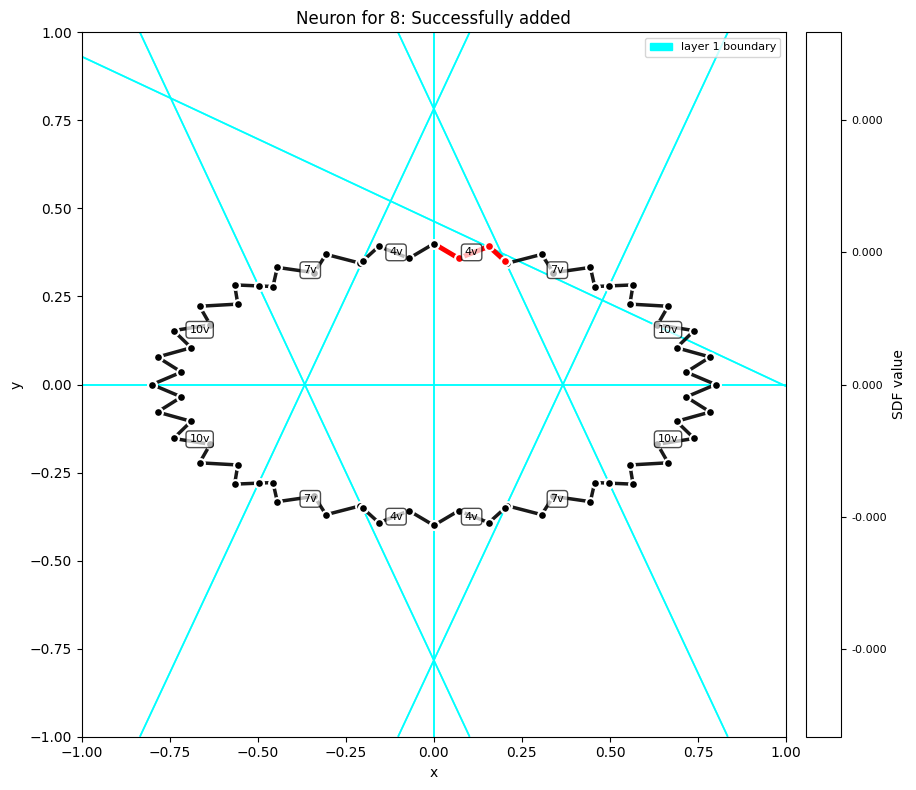

Surface 9: Solution error too large - skipping


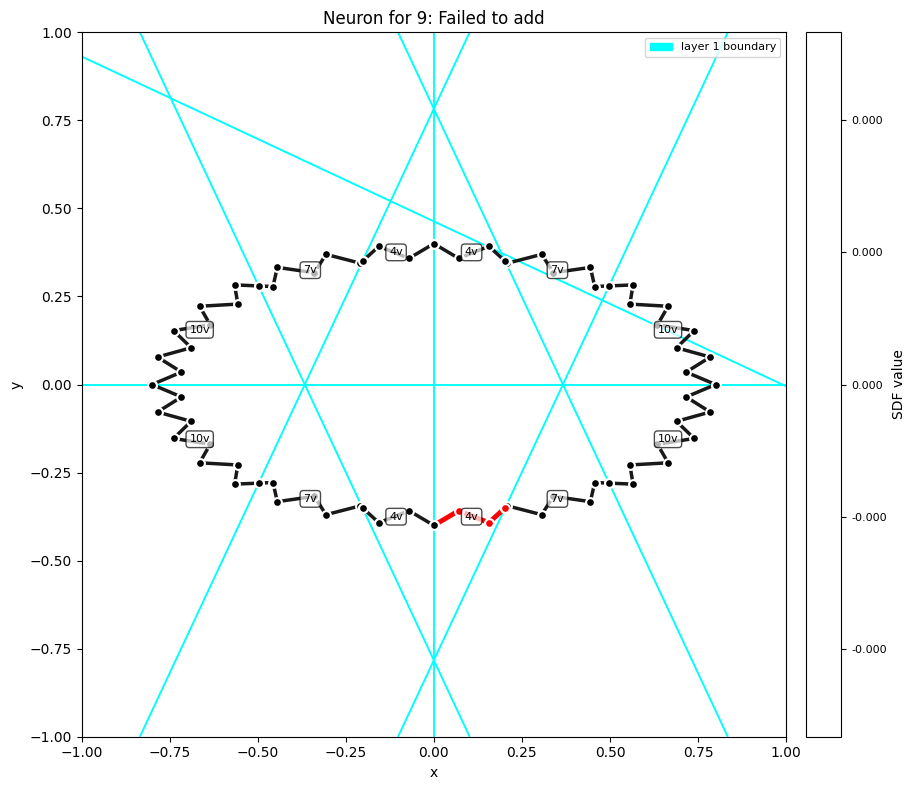

Surface 10: Solution error too large - skipping


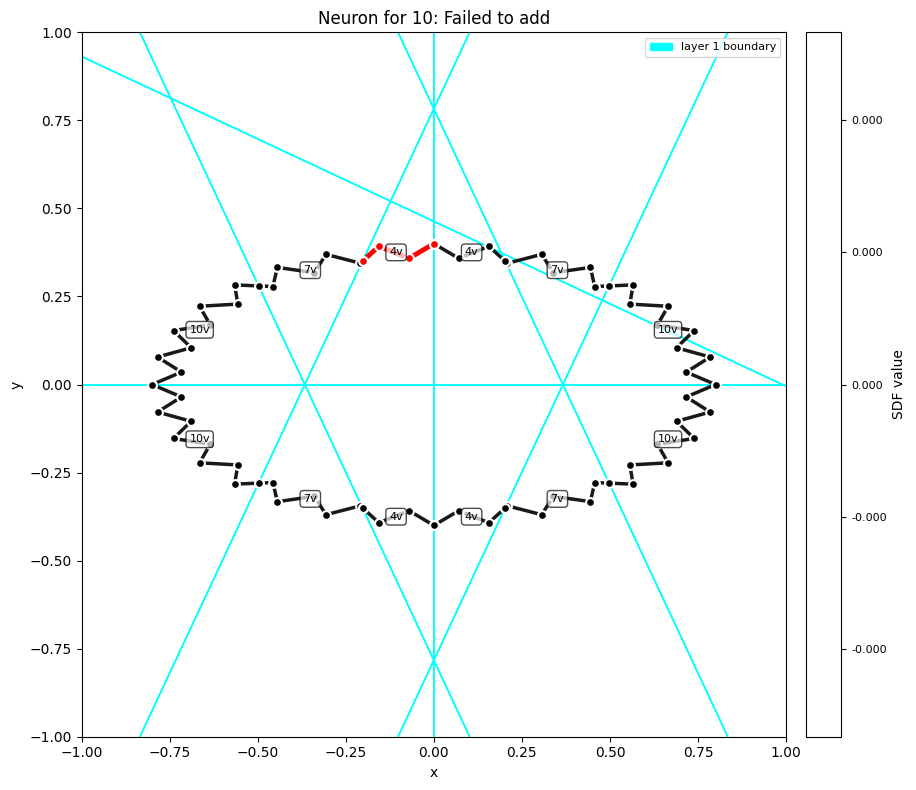

Surface 11: Solution error too large - skipping


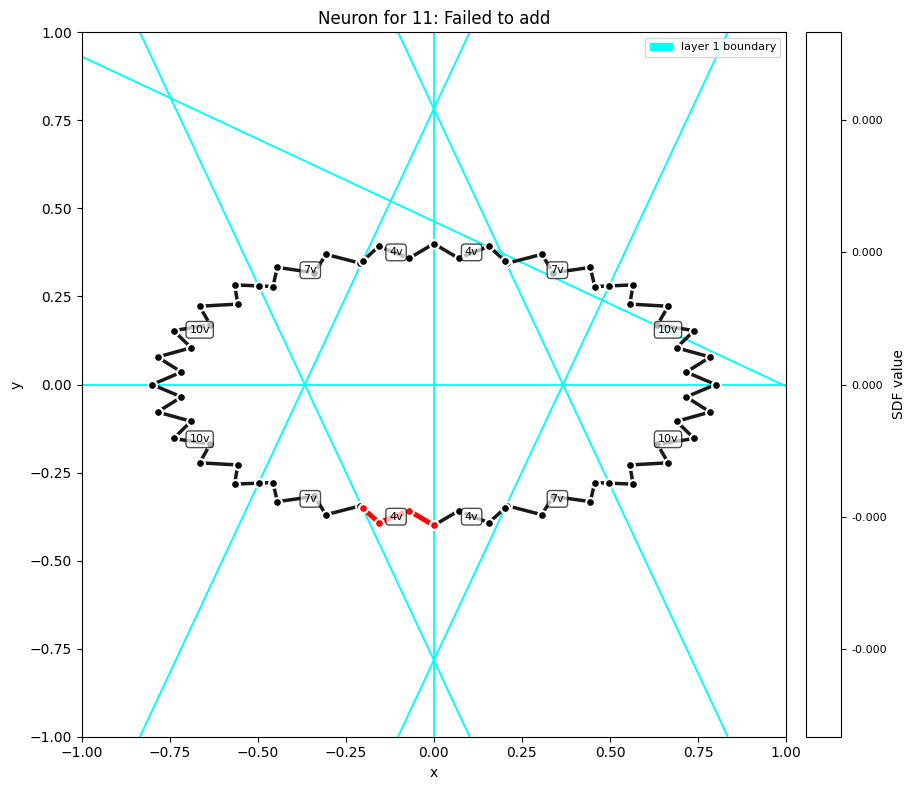

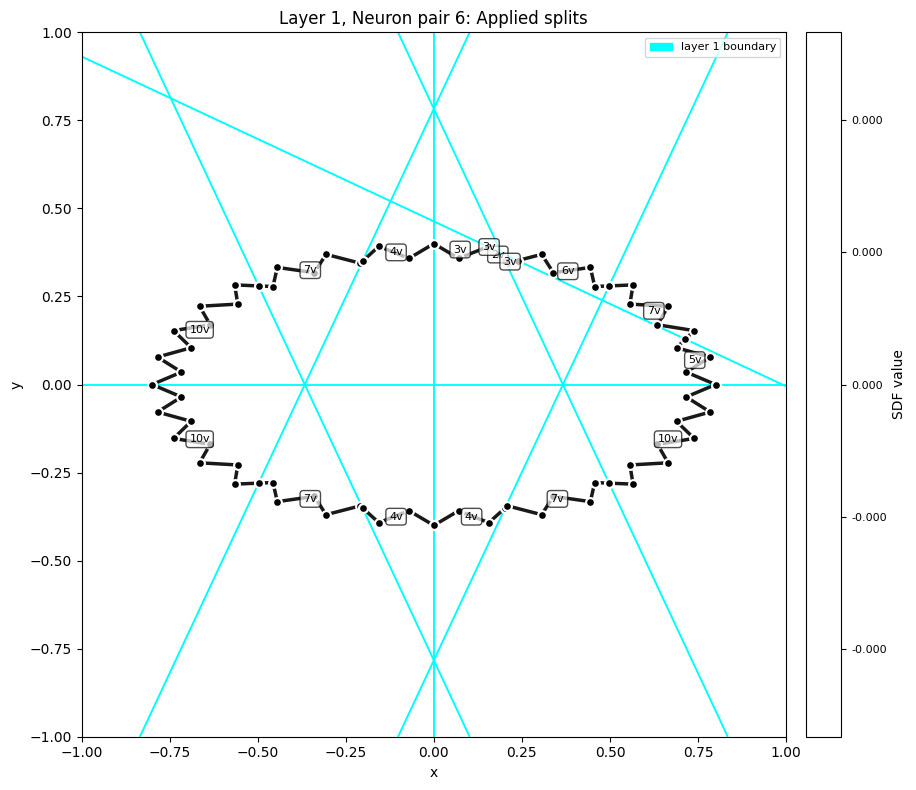

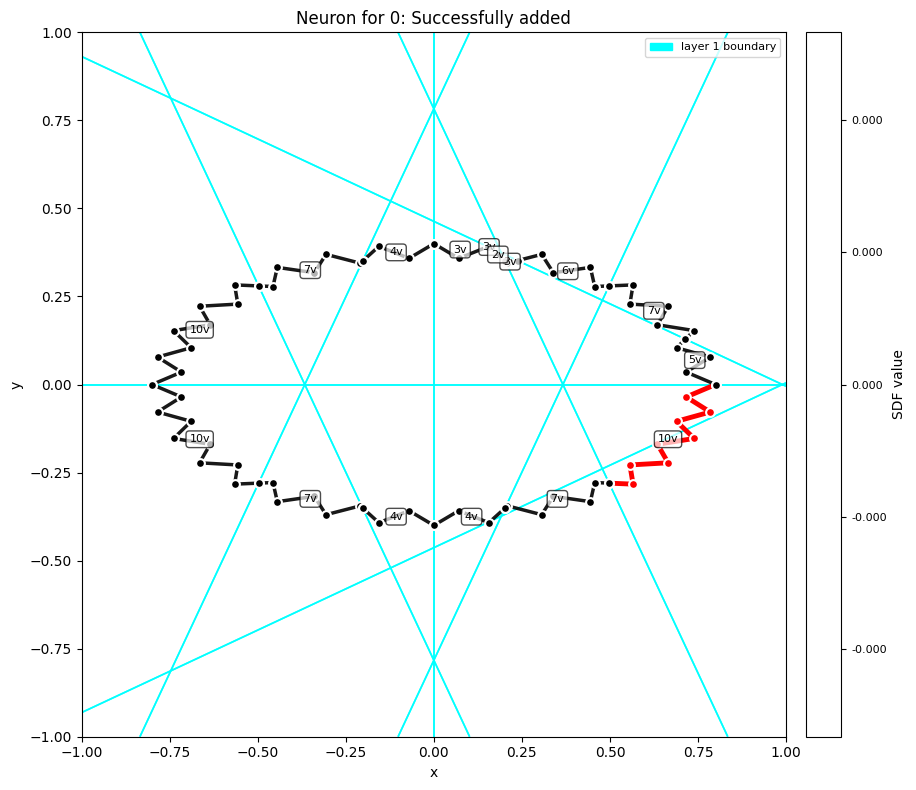

Surface 1: Solution error too large - skipping


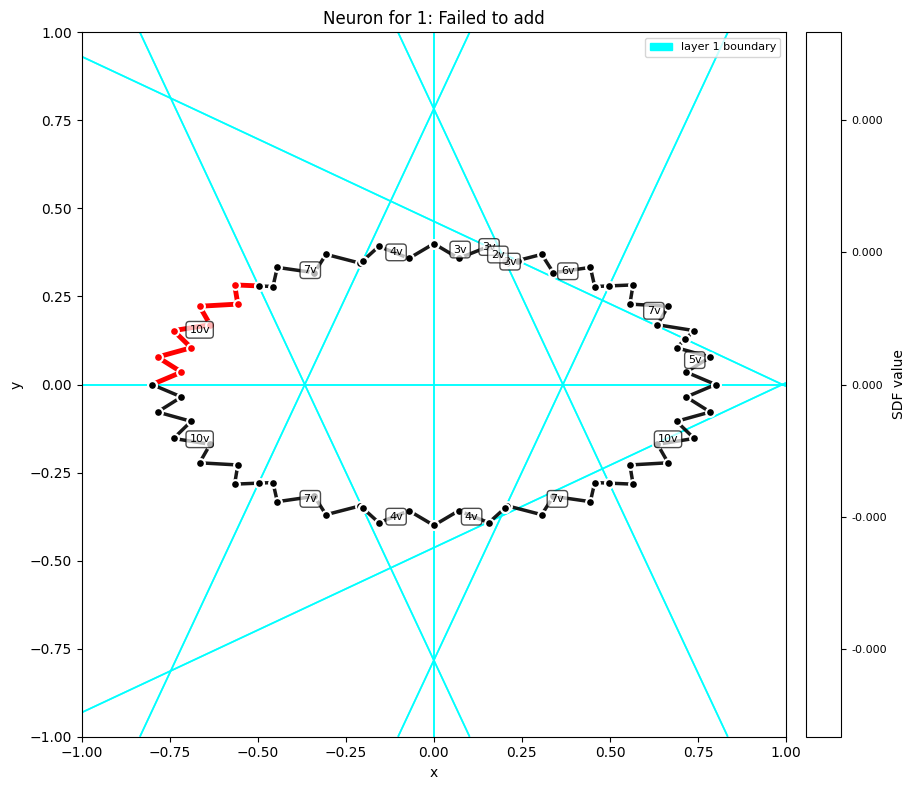

Surface 2: Solution error too large - skipping


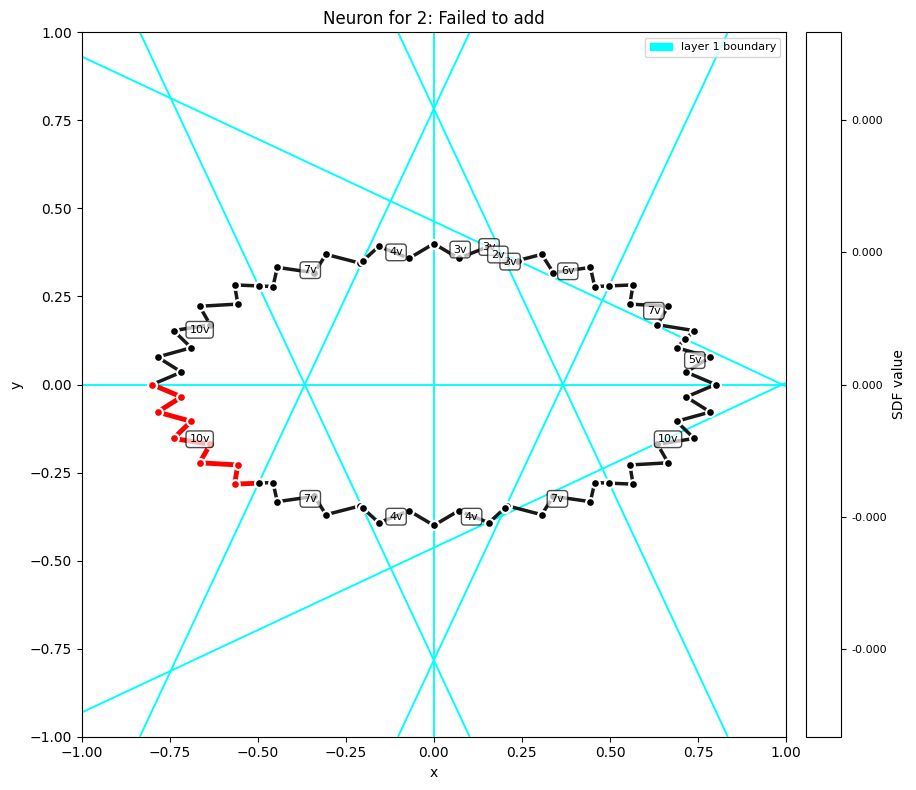

Surface 3: Solution error too large - skipping
Surface 3: Solution error too large - skipping


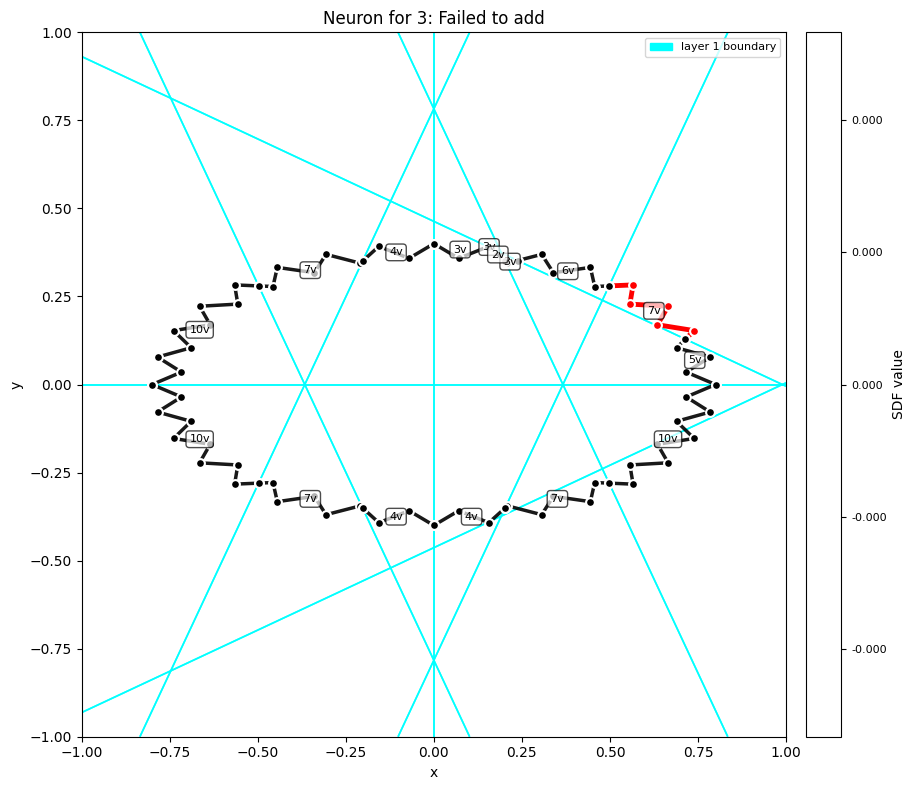

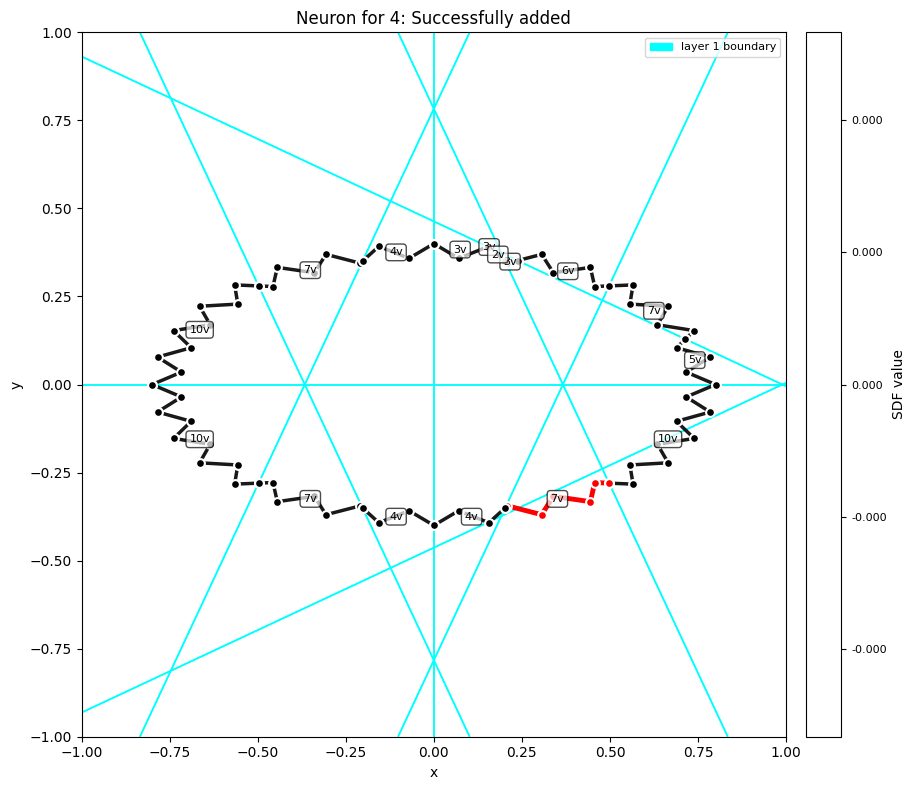

Surface 5: Solution error too large - skipping


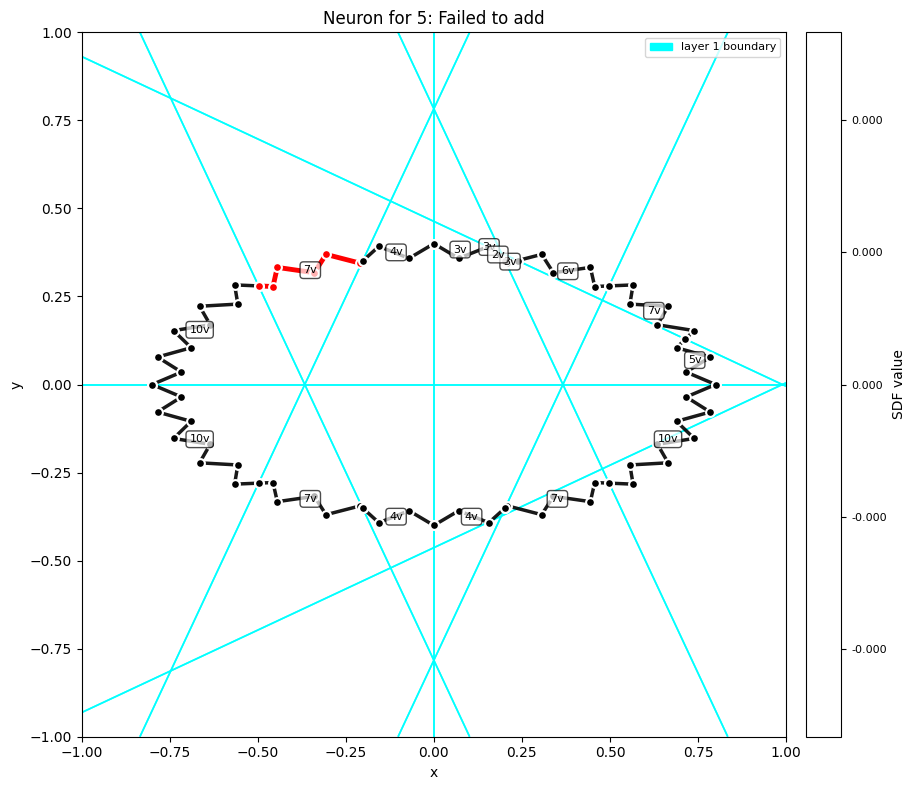

Surface 6: Solution error too large - skipping


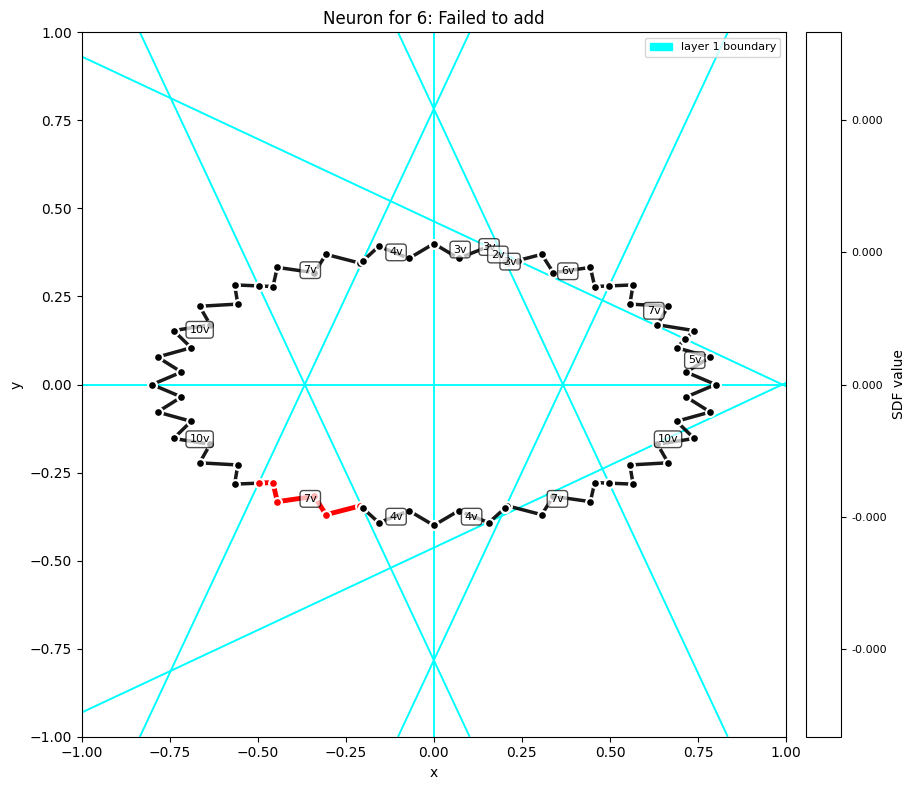

Surface 7: Solution error too large - skipping
Surface 7: Solution error too large - skipping


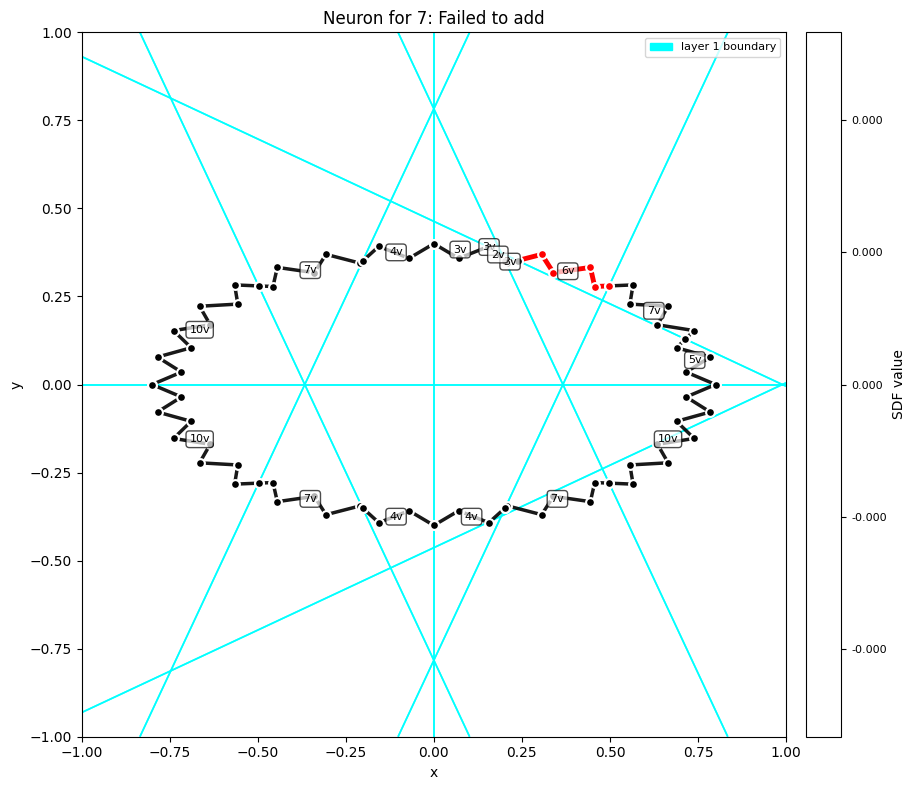

Surface 8: Solution error too large - skipping
Surface 8: Solution error too large - skipping


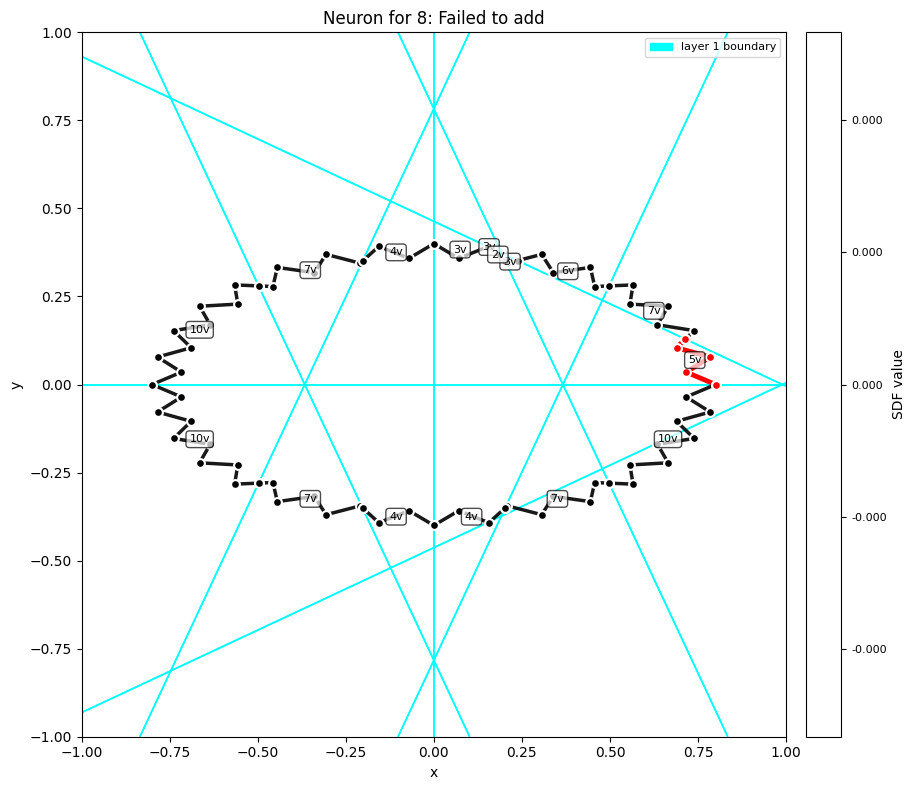

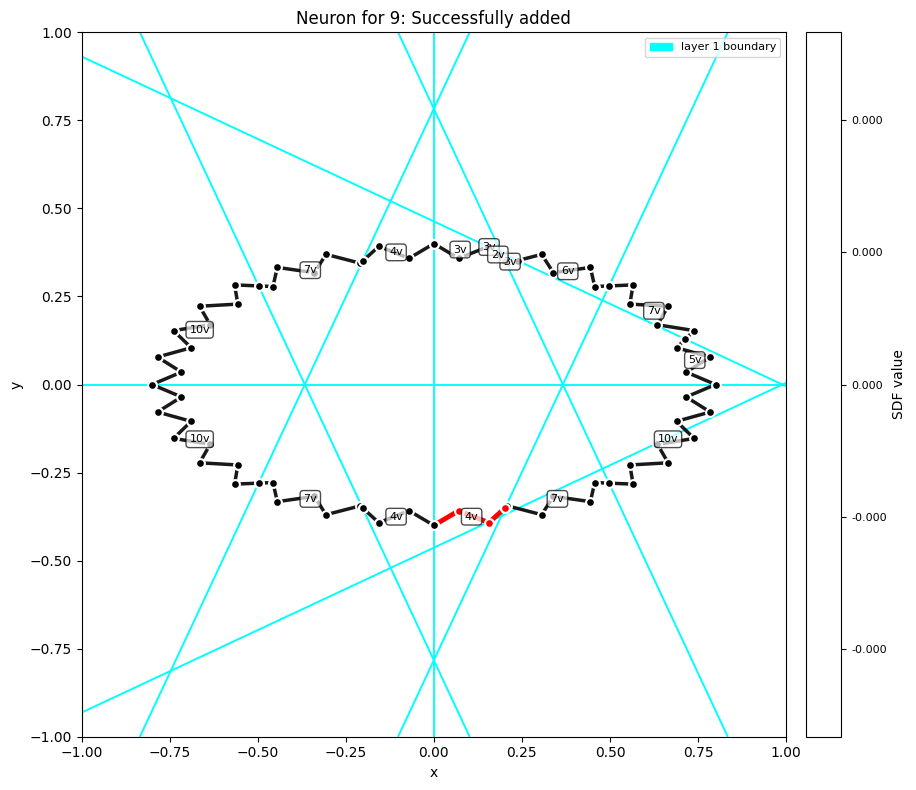

Surface 10: Solution error too large - skipping


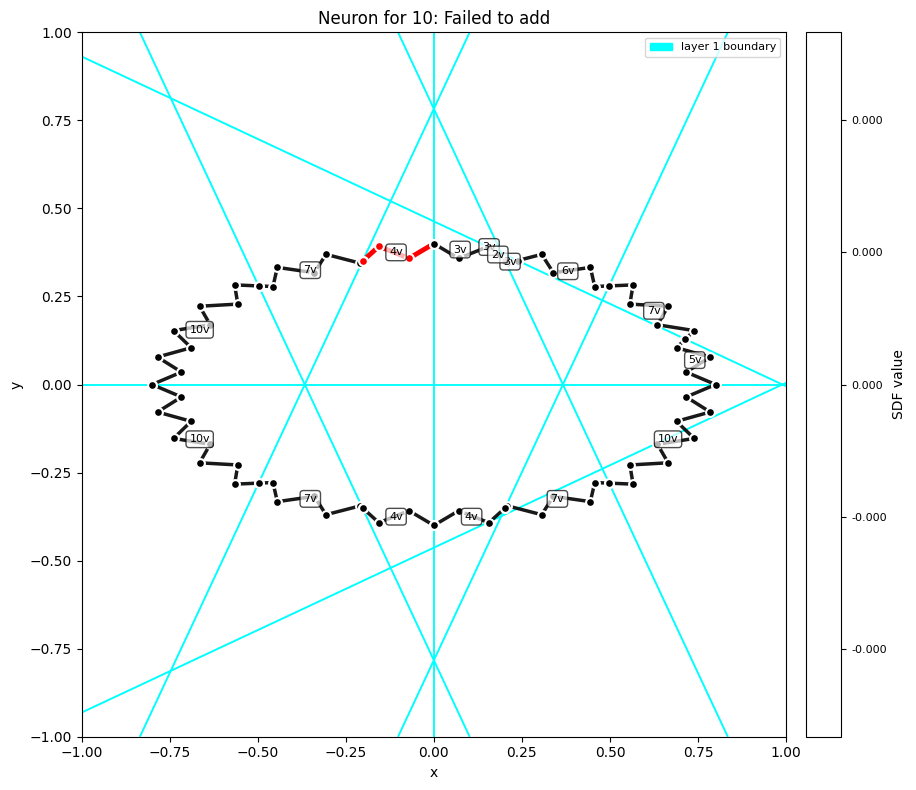

Surface 11: Solution error too large - skipping


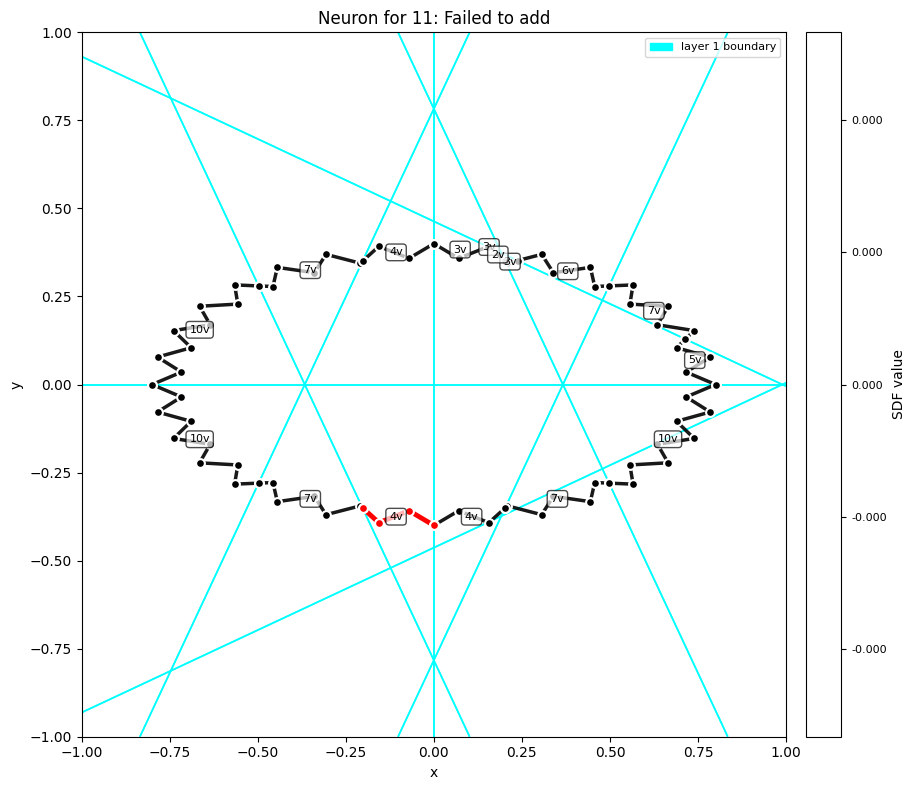

Surface 12: Solution error too large - skipping
Surface 12: Solution error too large - skipping


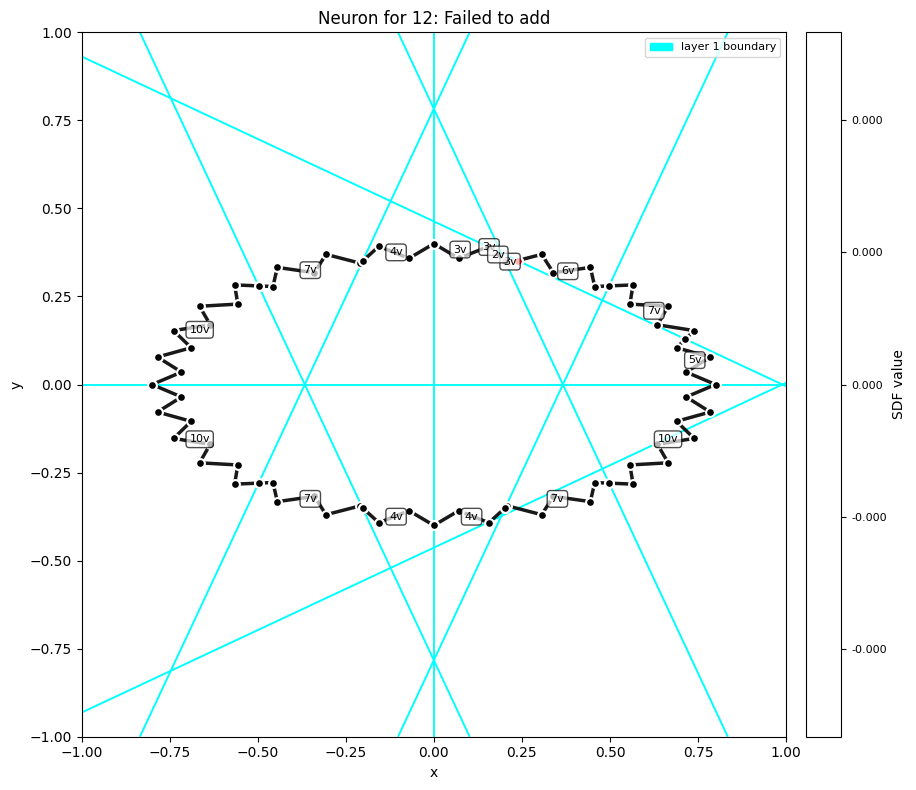

Surface 13: Solution error too large - skipping
Surface 13: Solution error too large - skipping


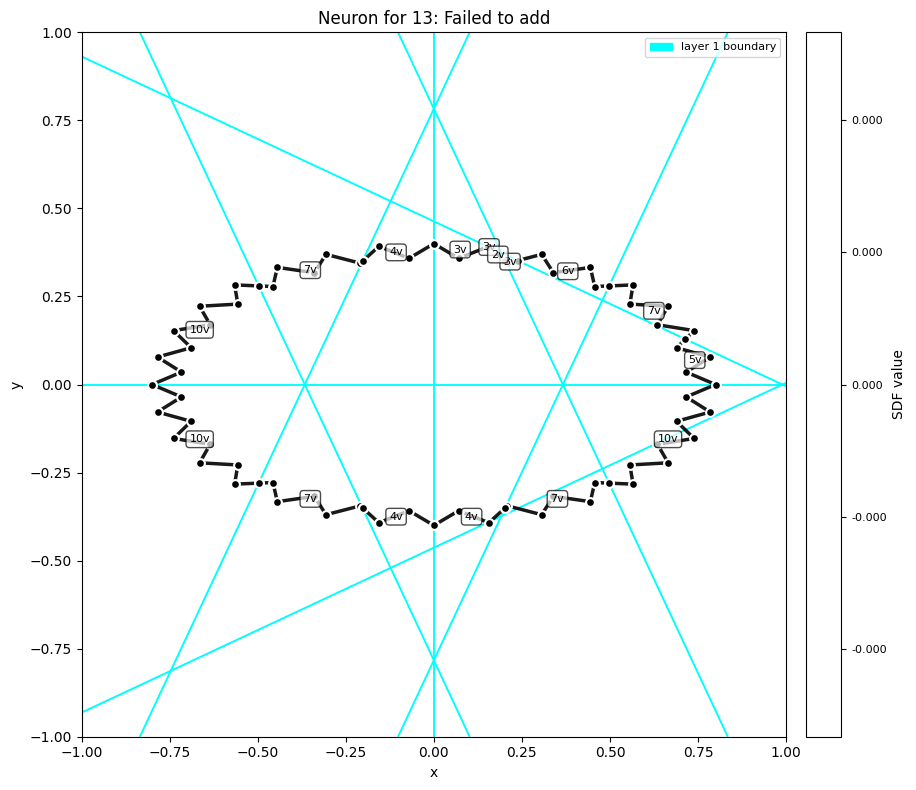

Surface 14: Solution error too large - skipping
Surface 14: Solution error too large - skipping


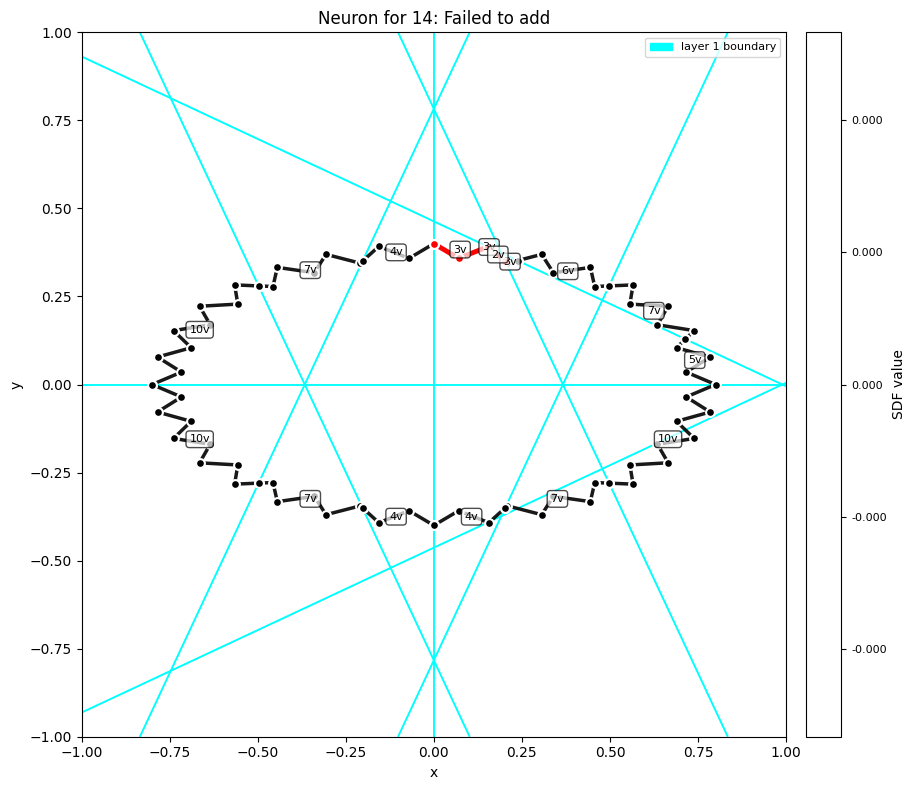

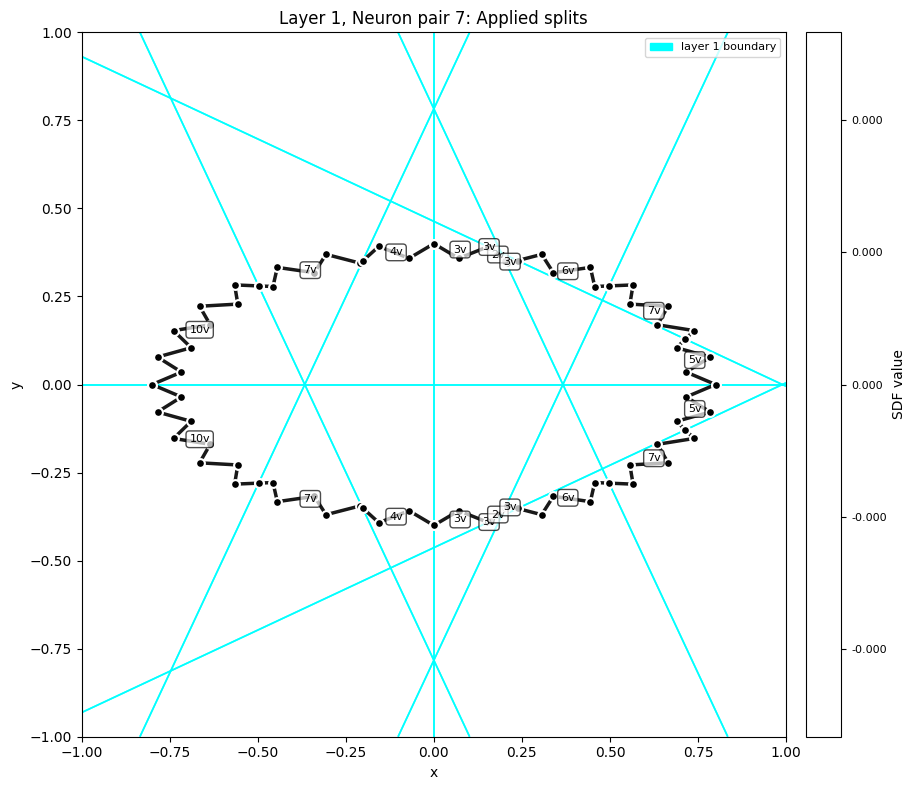

  Rank=11/17, RMS error=0.160781, max error=0.455698


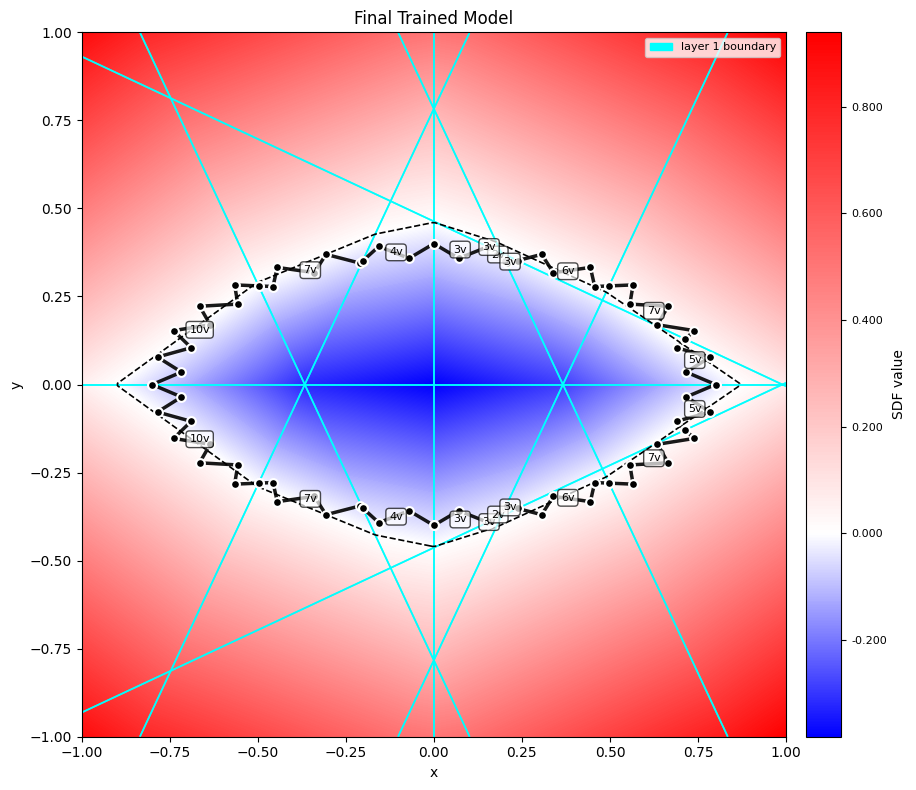

In [ ]:
import numpy as np
import torch
from ainr.cell import Surface2D, Cell, build_layer, collapse_layers, compute_pca, solve_output_layer_analytically
from ainr.ground_truth import generate_polygons
from ainr.vis import plot_polygons, plot_cell_sdf2 as plot_cell_sdf
from ainr.model import ReluMLP

polygons = generate_polygons('1x32', convex=False, stretch=(1, 0.5), star_ratio=0.9)
    
surfaces = [Surface2D(polygon, True) for polygon in polygons]
cells = [Cell(surfaces, np.eye(2), np.zeros(2), [])]
mlp = ReluMLP(2, 16, 1, skip_connections=False)

for layer in mlp.layers:
    layer.weight.data = torch.zeros_like(layer.weight.data)
    layer.bias.data = torch.zeros_like(layer.bias.data)


# Build first 4 principle components
components, mean = compute_pca(cell)
for i in range(2):
    

# Build all layers iteratively
for layer_idx in range(mlp.num_layers):
    # Build layer
    cells = build_layer(mlp, layer_idx, cells, vis=True)
    
    # Collapse previous layers with this layer
    cells = collapse_layers(
        cells, 
        mlp.layers[layer_idx].weight.data, 
        mlp.layers[layer_idx].bias.data
    )

# Solve output layer analytically using boundary constraints
solve_output_layer_analytically(mlp, cells)

plot_cell_sdf(mlp, cells=cells, title="Final Trained Model")